# 1. Project description

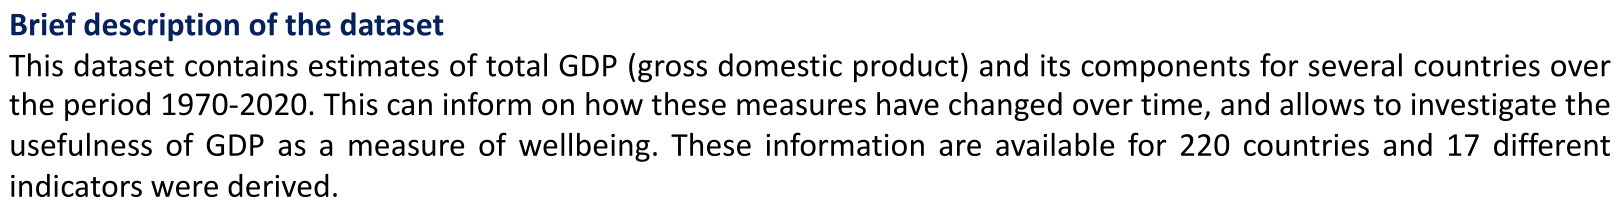

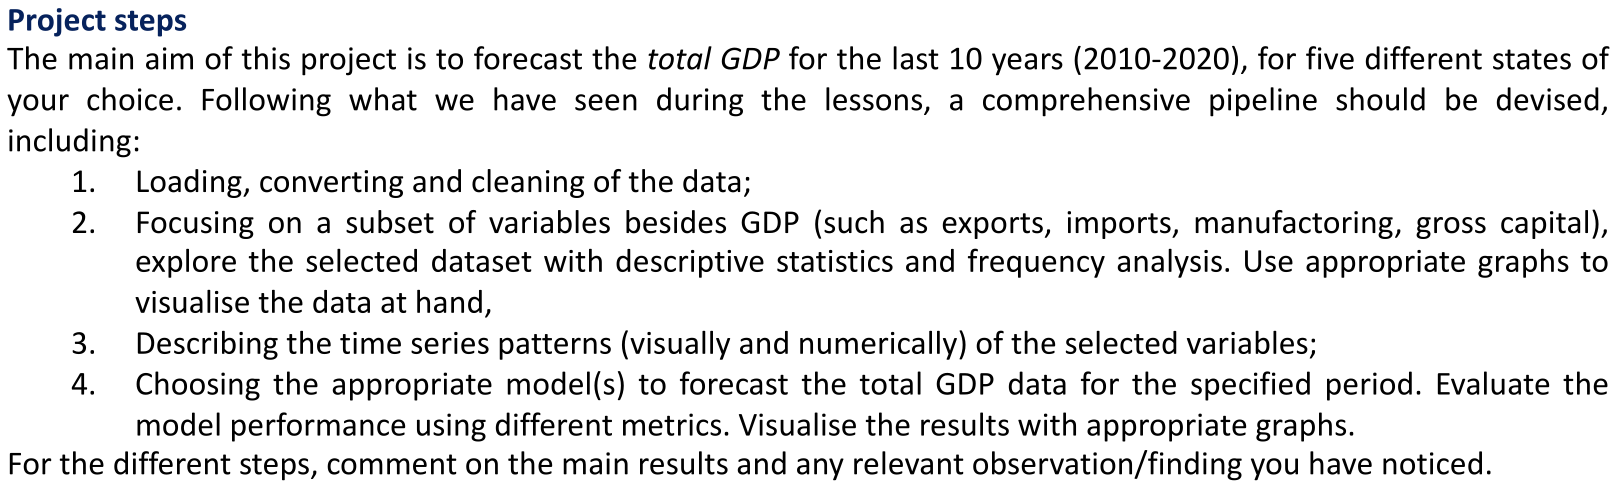

# 2. Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from numpy.fft import fft
from statsmodels.tsa.seasonal import seasonal_decompose
import functions as f
from cycler import cycler
import warnings
warnings.filterwarnings("ignore")

# Set default display parameters
#plt.rcParams['figure.figsize'] = [8, 6]
#plt.rcParams['figure.dpi'] = 140
#plt.rcParams['axes.prop_cycle'] = cycler(color=['#7180AC', '#6A605C', 'b', 'y'])
#plt.rcParams['lines.linewidth'] = 2.5
#plt.rcParams['axes.facecolor'] = 'black'

# 3. Create dataframes

In [2]:
df_iniziale = pd.read_csv('GDPconstant-USD-countries.csv', index_col = 'CountryID')

df, valid_nations = f.preprocess_df(df_iniziale)

In [3]:
df.head(3)

Country                                      IndicatorName  \
CountryID                                                               
8          Albania                      Final consumption expenditure   
8          Albania  Household consumption expenditure (including N...   
8          Albania   General government final consumption expenditure   

                   1970          1971          1972          1973  \
CountryID                                                           
8          2.035896e+09  2.117670e+09  2.202717e+09  2.290083e+09   
8          1.952117e+09  2.030508e+09  2.112067e+09  2.195867e+09   
8          8.830853e+07  9.187170e+07  9.554977e+07  9.931108e+07   

                   1974          1975          1976          1977  ...  \
CountryID                                                          ...   
8          2.383229e+09  2.478907e+09  2.573526e+09  2.686010e+09  ...   
8          2.285082e+09  2.376931e+09  2.467748e+09  2.575058e+09  ...   
8          1.034472e+08  1.074913e+08  1.115066e+08  1.169159e+08  ...   

                   2011          2012          2013          2014  \
CountryID                                                           
8          9.829417e+09  9.841766e+09  1.003528e+10  1.036170e+10   
8          8.662830e+09  8.673986e+09  8.833231e+09  9.081697e+09   
8          1.167228e+09  1.168429e+09  1.202395e+09  1.279283e+09   

                   2015          2016          2017          2018  \
CountryID                                                           
8          1.045381e+10  1.070931e+10  1.098068e+10  1.129870e+10   
8          9.188655e+09  9.383914e+09  9.613148e+09  9.922240e+09   
8          1.265160e+09  1.324583e+09  1.366461e+09  1.376212e+09   

                   2019          2020  
CountryID                              
8          1.165178e+10  1.142641e+10  
8          1.023528e+10  1.002502e+10  
8          1.416324e+09  1.400874e+09  

[3 rows x 53 columns]

In [4]:
nation_list = f.create_nation_list(valid_nations, df)
nation_list

['Finland', 'Argentina', 'Belgium', 'Philippines', 'Germany']

Default target countries = Finland, Argentina, Belgium, Canada, South Africa

Default target variables = Import, Export, Manufacturing, Gross Capital

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1921 entries, 8 to 716
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        1921 non-null   object 
 1   IndicatorName  1921 non-null   object 
 2   1970           1921 non-null   float64
 3   1971           1921 non-null   float64
 4   1972           1921 non-null   float64
 5   1973           1921 non-null   float64
 6   1974           1921 non-null   float64
 7   1975           1921 non-null   float64
 8   1976           1921 non-null   float64
 9   1977           1921 non-null   float64
 10  1978           1921 non-null   float64
 11  1979           1921 non-null   float64
 12  1980           1921 non-null   float64
 13  1981           1921 non-null   float64
 14  1982           1921 non-null   float64
 15  1983           1921 non-null   float64
 16  1984           1921 non-null   float64
 17  1985           1921 non-null   float64
 18  1986          

In [6]:
df_1 = df[df['Country'] == nation_list[0]]
df_1 = f.create_df(df_1)
df_2 = df[df['Country'] == nation_list[1]]
df_2 = f.create_df(df_2)
df_3 = df[df['Country'] == nation_list[2]]
df_3 = f.create_df(df_3)
df_4 = df[df['Country'] == nation_list[3]]
df_4 = f.create_df(df_4)
df_5 = df[df['Country'] == nation_list[4]]
df_5 = f.create_df(df_5)

df_list = [df_1, df_2, df_3, df_4, df_5]

In [7]:
for idx, df in enumerate(df_list):
    print(nation_list[idx])
    print(df.info())
    print('----------------------------------------------')

Finland
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 1970-01-01 to 2020-01-01
Freq: YS-JAN
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Exports        51 non-null     object
 1   Imports        51 non-null     object
 2   Manufacturing  51 non-null     object
 3   Gross_capital  51 non-null     object
 4   GDP            51 non-null     object
dtypes: object(5)
memory usage: 2.4+ KB
None
----------------------------------------------
Argentina
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 1970-01-01 to 2020-01-01
Freq: YS-JAN
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Exports        51 non-null     object
 1   Imports        51 non-null     object
 2   Manufacturing  51 non-null     object
 3   Gross_capital  51 non-null     object
 4   GDP            51 non-null     object
dtypes: object(5)


Change from object type to float type

In [8]:
df_1 = df_1.astype(float)
df_2 = df_2.astype(float)
df_3 = df_3.astype(float)
df_4 = df_4.astype(float)
df_5 = df_5.astype(float)

# 4. Descriptive statistics

In [9]:
for df in df_list:
    display(df.describe())

Exports       Imports  Manufacturing  Gross_capital           GDP
count   5.100000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
unique  5.100000e+01  5.100000e+01   5.100000e+01   5.000000e+01  5.100000e+01
top     1.066242e+10  1.400966e+10   8.941799e+09   3.074888e+10  7.886801e+10
freq    1.000000e+00  1.000000e+00   1.000000e+00   2.000000e+00  1.000000e+00

Exports       Imports  Manufacturing  Gross_capital           GDP
count   5.100000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
unique  4.900000e+01  5.100000e+01   5.100000e+01   5.000000e+01  5.100000e+01
top     1.569482e+10  7.042927e+09   4.501110e+10   4.372695e+10  2.464847e+11
freq    2.000000e+00  1.000000e+00   1.000000e+00   2.000000e+00  1.000000e+00

Exports       Imports  Manufacturing  Gross_capital           GDP
count   5.100000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
unique  5.100000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
top     5.687864e+10  5.747039e+10   2.290084e+10   3.976281e+10  1.725902e+11
freq    1.000000e+00  1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00

Exports       Imports  Manufacturing  Gross_capital           GDP
count   5.100000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
unique  5.100000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
top     5.110450e+09  6.125257e+09   1.239380e+10   8.307424e+09  5.073915e+10
freq    1.000000e+00  1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00

Exports       Imports  Manufacturing  Gross_capital           GDP
count   5.100000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
unique  5.100000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
top     1.533990e+11  1.618174e+11   3.625062e+11   4.146930e+11  1.398222e+12
freq    1.000000e+00  1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00

Check for the variable with the highest correlation with GDP

In [10]:
corr_1 = df_1.corr()
corr_2 = df_2.corr()
corr_3 = df_3.corr()
corr_4 = df_4.corr()
corr_5 = df_5.corr()

corr_list = [corr_1, corr_2, corr_3, corr_4, corr_5]

max_list = []
f.highest_corr_variable(corr_list, max_list, nation_list)

Highest correlation variable
Finland                          Exports
Argentina                        Imports
Belgium                          Exports
Philippines                Manufacturing
Germany                    Manufacturing

# 5. Descriptive plots

## 5.1 Line-plot 

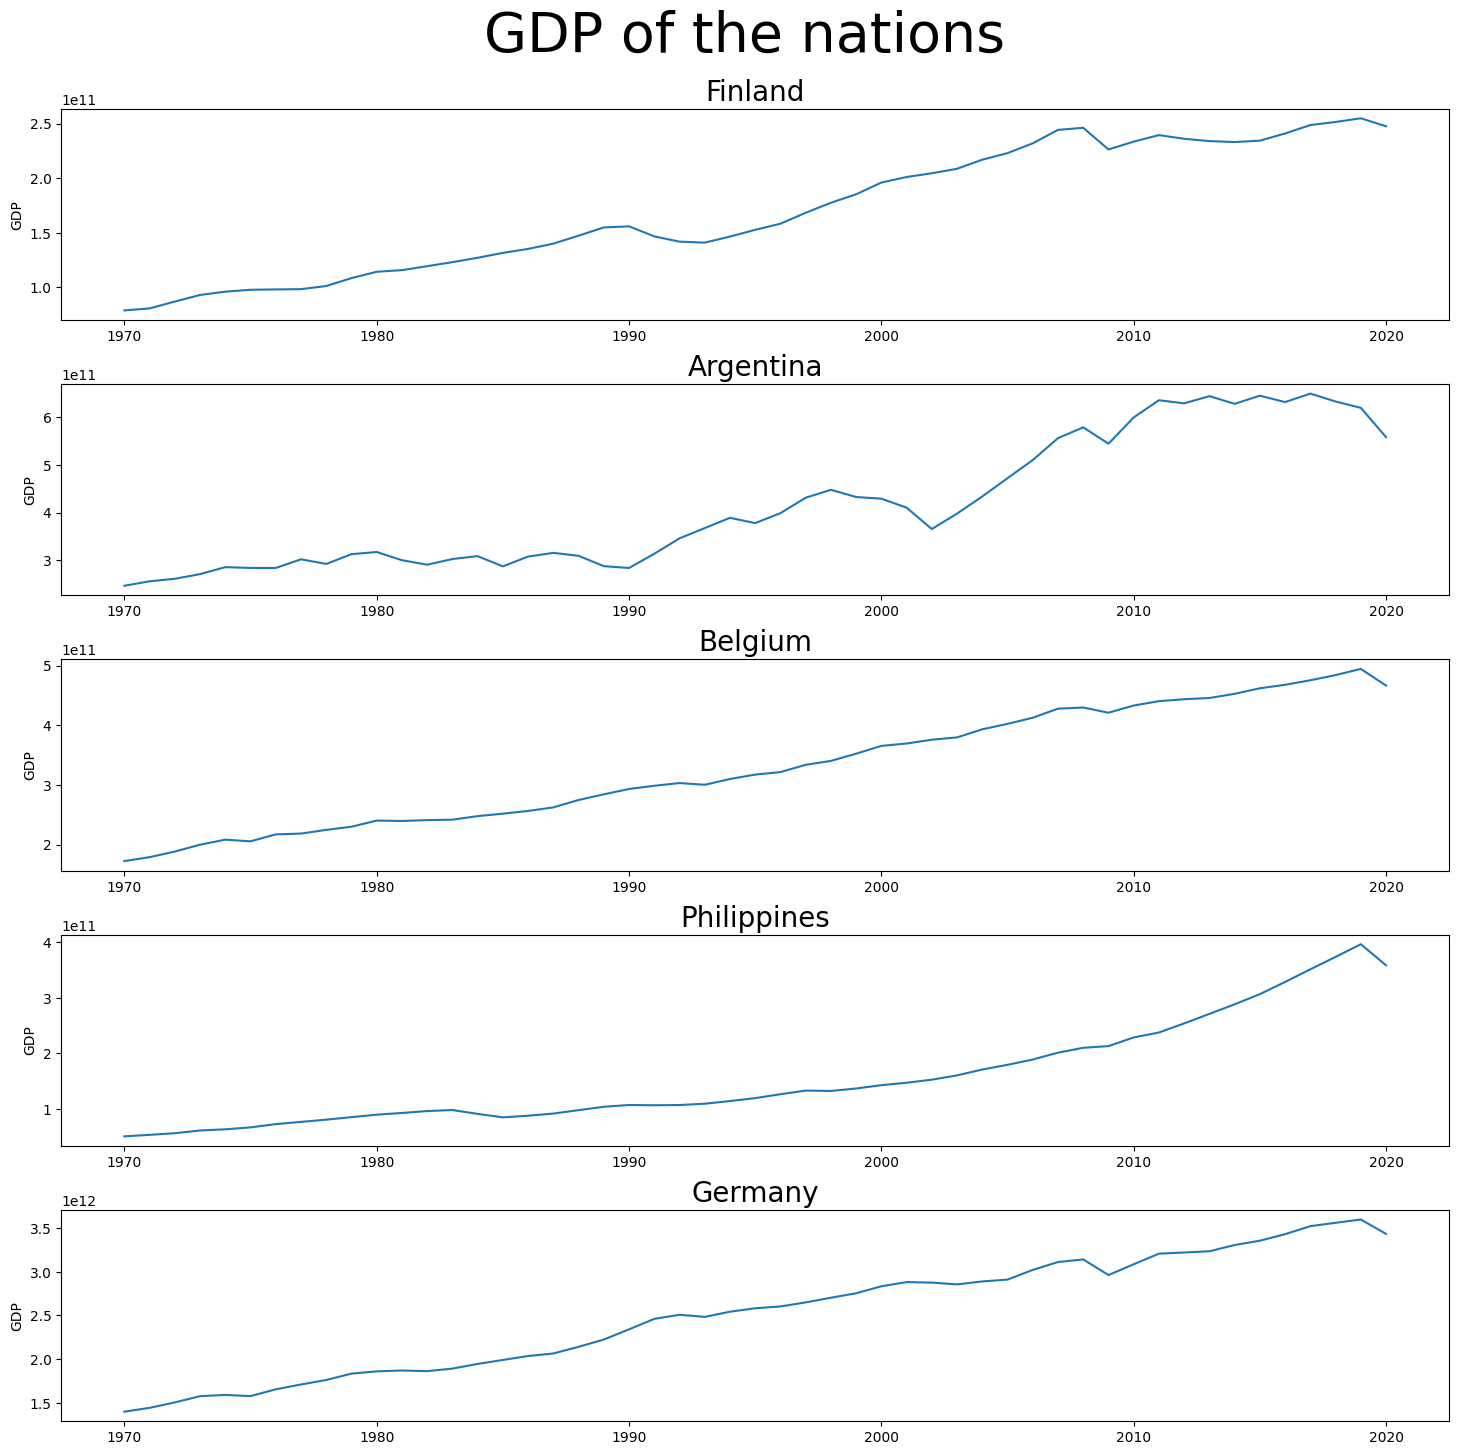

In [11]:
fig, ax = plt.subplots(5, 1, figsize = (15, 15))
plt.suptitle('GDP of the nations', fontsize = 40)
plt.tight_layout(pad = 2.5)

for idx, df in enumerate(df_list):
    sns.lineplot(df['GDP'], ax = ax[idx])
    ax[idx].set_title(nation_list[idx], fontsize = 20)

plt.show()

GDP has similar trend for all the states

## 5.2 Correlation heatmap

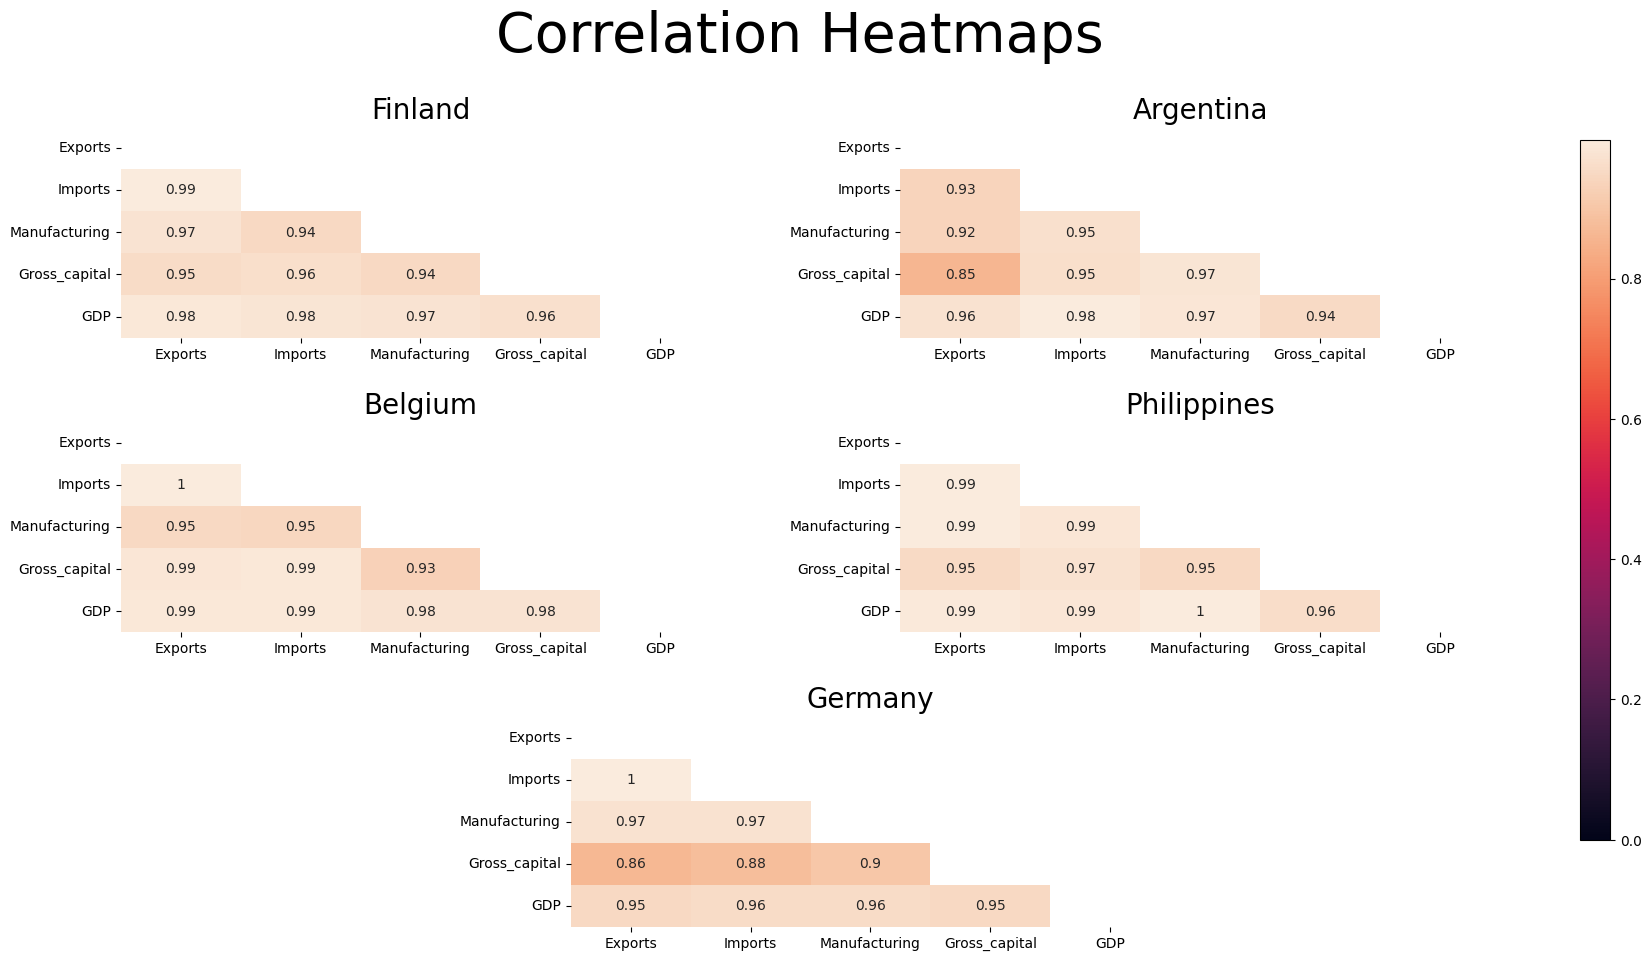

In [12]:
fig, ax = plt.subplots(3, 2, figsize = (15, 10))
plt.suptitle('Correlation Heatmaps', fontsize = 40)
plt.tight_layout(pad = 2.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.3)

matrix = np.triu(corr_1)
sns.heatmap(corr_1,annot = True, ax = ax[0][0], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_2)
sns.heatmap(corr_2, annot = True, ax = ax[0][1], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_3)
sns.heatmap(corr_3, annot = True, ax = ax[1][0], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_4)
sns.heatmap(corr_4, annot = True, ax = ax[1][1], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_5)
sns.heatmap(corr_5, annot = True, ax = ax[2][0], vmin = 0, cbar = False, mask = matrix)
fig.delaxes(ax[2][1])

ax[0][0].set_title(nation_list[0], fontsize = 20)
ax[0][1].set_title(nation_list[1], fontsize = 20)
ax[1][0].set_title(nation_list[2], fontsize = 20)
ax[1][1].set_title(nation_list[3], fontsize = 20)
ax[2][0].set_title(nation_list[4], fontsize = 20)

pos = ax[2][0].get_position()
new_pos = [pos.x0 + 0.3, pos.y0, pos.width, pos.height]
ax[2][0].set_position(new_pos)
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
fig.colorbar(ax[2][0].collections[0], cax = cbar_ax)

plt.show()

Correlation is high between all the variables in all the states

## 5.3 Scatterplot 
Visualize the lowest correlation between 2 variables in all the states to prove the previous statement

Tuple of variables for every nation with lowest correlation:


0              1
Finland      Manufacturing  Gross_capital
Argentina          Exports  Gross_capital
Belgium      Manufacturing  Gross_capital
Philippines  Manufacturing  Gross_capital
Germany            Exports  Gross_capital

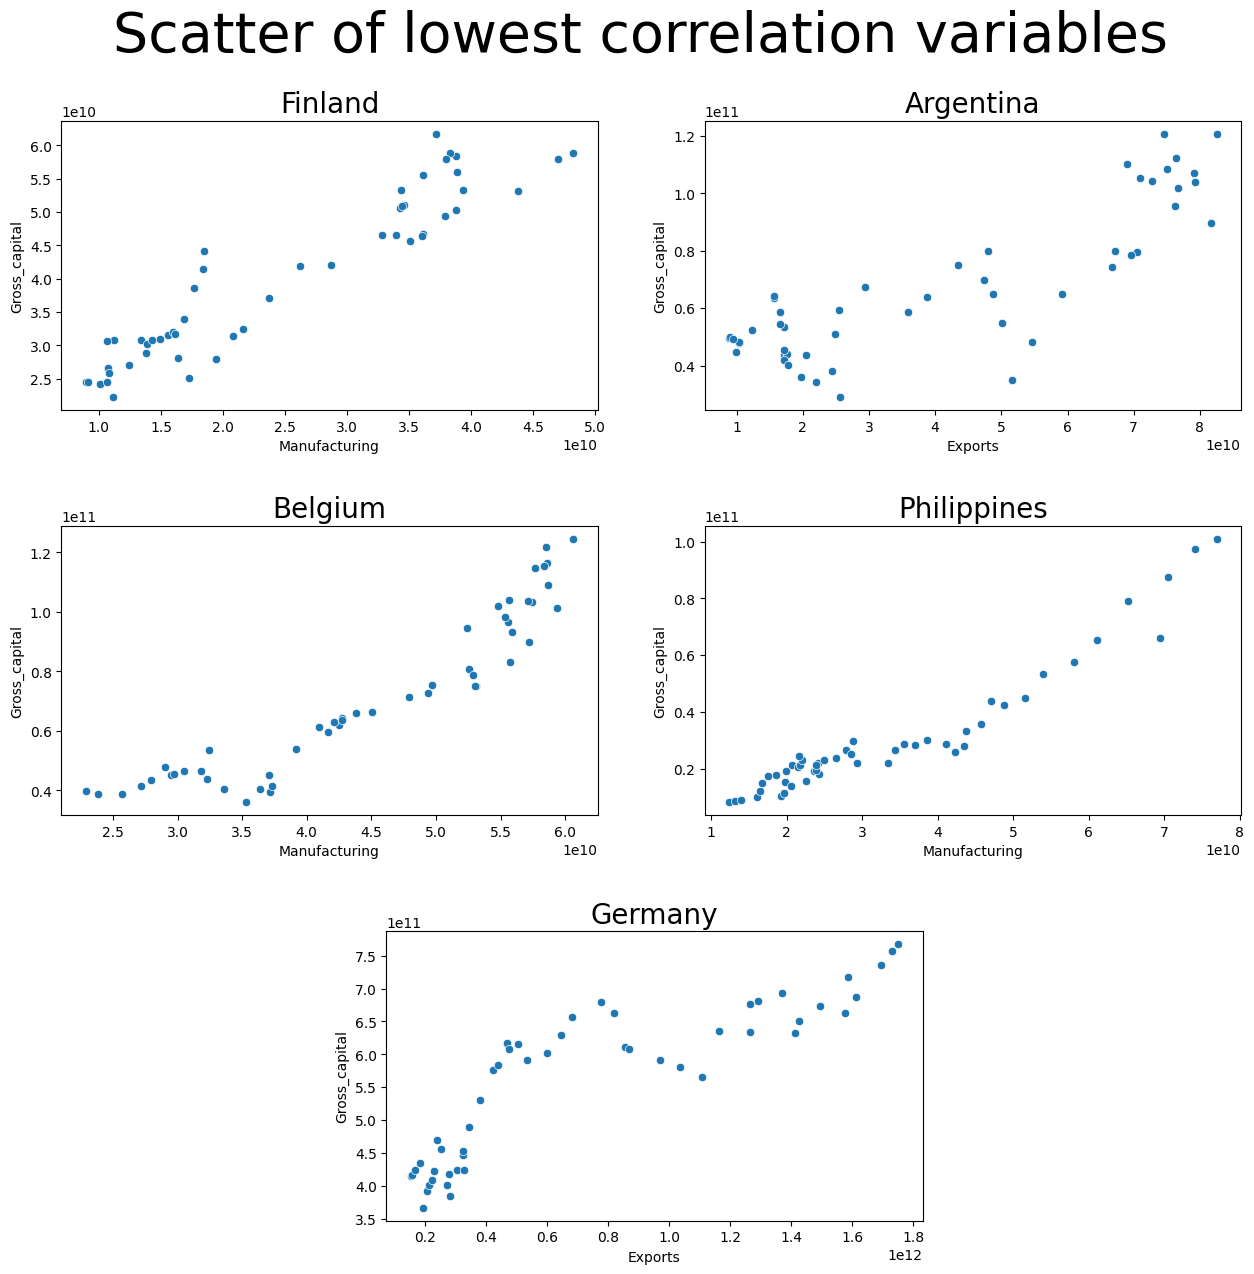

In [13]:
low_corr_list = []

fig, ax = plt.subplots(3, 2, figsize = (13, 13))
plt.suptitle('Scatter of lowest correlation variables', fontsize = 40)
plt.tight_layout(pad = 2.8, h_pad = 1.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

idx = f.lowest_corr_variable(corr_1)
low_corr_list.append(idx)
sns.scatterplot(x = df_1[idx[0]], y = df_1[idx[1]], ax = ax[0][0])
idx = f.lowest_corr_variable(corr_2)
low_corr_list.append(idx)
sns.scatterplot(x = df_2[idx[0]], y = df_2[idx[1]], ax = ax[0][1])
idx = f.lowest_corr_variable(corr_3)
low_corr_list.append(idx)
sns.scatterplot(x = df_3[idx[0]], y = df_3[idx[1]], ax = ax[1][0])
idx = f.lowest_corr_variable(corr_4)
low_corr_list.append(idx)
sns.scatterplot(x = df_4[idx[0]], y = df_4[idx[1]], ax = ax[1][1])
idx = f.lowest_corr_variable(corr_5)
low_corr_list.append(idx)
sns.scatterplot(x = df_5[idx[0]], y = df_5[idx[1]], ax = ax[2][0])
fig.delaxes(ax[2][1])

ax[0][0].set_title(nation_list[0], fontsize = 20)
ax[0][1].set_title(nation_list[1], fontsize = 20)
ax[1][0].set_title(nation_list[2], fontsize = 20)
ax[1][1].set_title(nation_list[3], fontsize = 20)
ax[2][0].set_title(nation_list[4], fontsize = 20)

pos = ax[2][0].get_position()
new_pos = [pos.x0 + 0.25, pos.y0, pos.width, pos.height]
ax[2][0].set_position(new_pos)

print('Tuple of variables for every nation with lowest correlation:')
display(pd.DataFrame(low_corr_list, index = nation_list))

plt.show()

## 5.4 Lag-plot

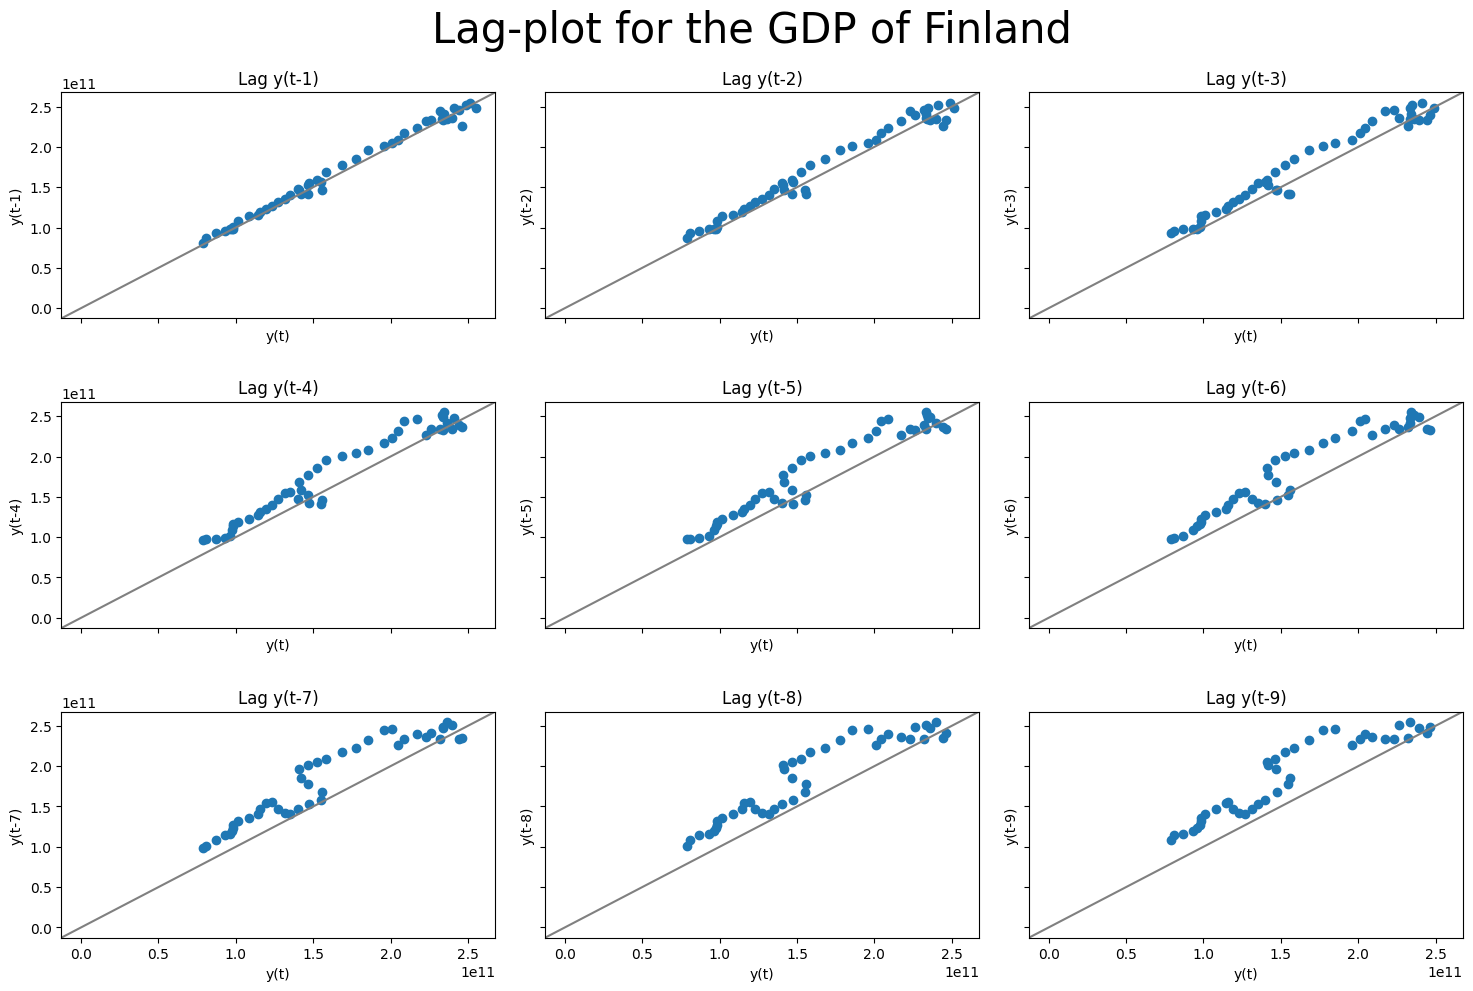

In [14]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(15,10))
fig.suptitle(f'Lag-plot for the GDP of {nation_list[0]}', fontsize = 30)
plt.tight_layout(pad = 2, h_pad = 5)

for i, ax in enumerate(axes.flatten()[:9]):
    pd.plotting.lag_plot(df_1['GDP'], lag = i+1, ax = ax)
    ax.set_xlabel('y(t)')
    ax.set_ylabel('y(t-'+str(i+1)+')')
    ax.set_title(f'Lag y(t-{str(i+1)})')
    pt = (350, 350)
    ax.axline(pt, slope=1, color='gray')



## 5.5 ACF and PACF of GDP

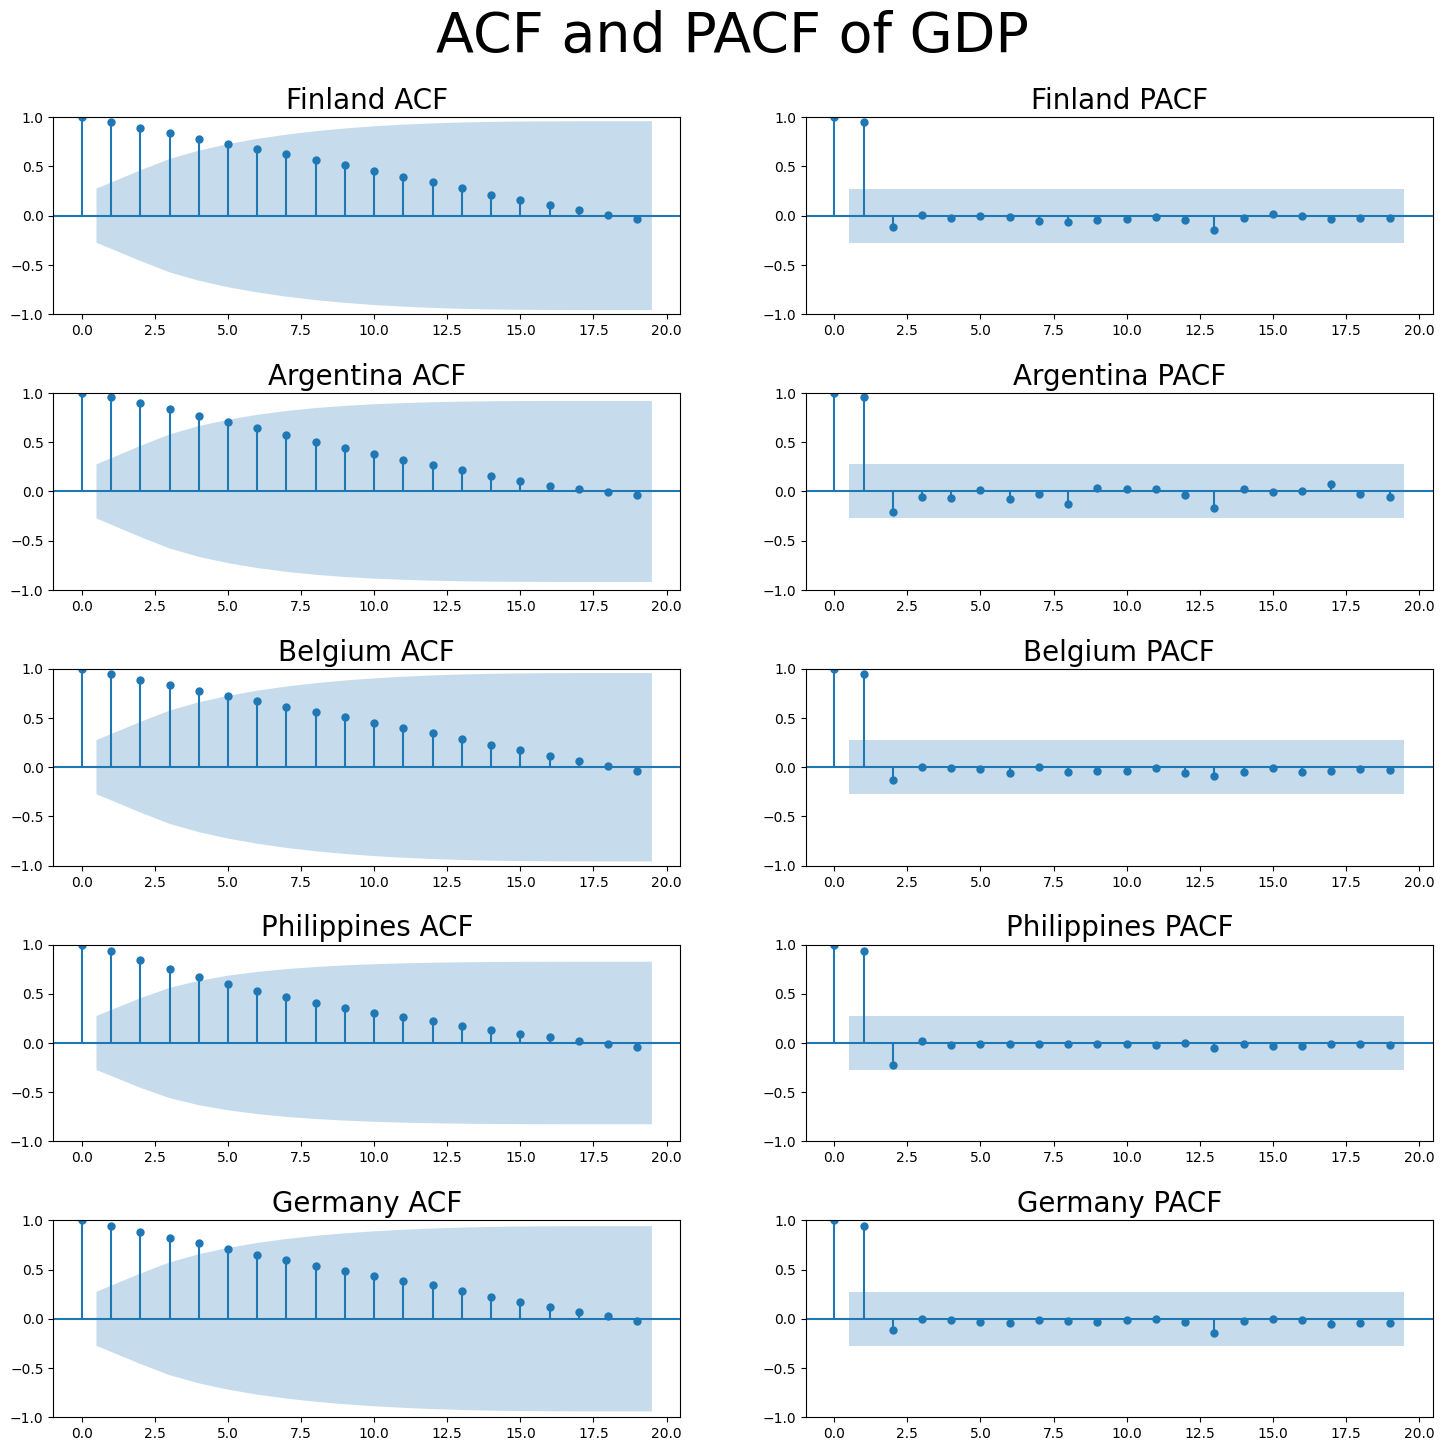

In [15]:
fig, ax = plt.subplots(5, 2, figsize = (15, 15))
plt.suptitle('ACF and PACF of GDP', fontsize = 40)
plt.tight_layout(pad = 2.8, h_pad = 1.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

for idx, df in enumerate(df_list):
    plot_acf(df['GDP'], lags = 19, ax = ax[idx][0])
    ax[idx][0].set_title(f'{nation_list[idx]} ACF', fontsize = 20)
    plot_pacf(df['GDP'], lags = 19, ax = ax[idx][1])
    ax[idx][1].set_title(f'{nation_list[idx]} PACF', fontsize = 20)

# 6. Split data in train and test 

In [16]:
df_train_test = {}

for idx, df in enumerate(df_list):
    df_train_test[nation_list[idx]] = f.train_test_split(df)

In [17]:
df_train_test['Finland'][0]

Exports       Imports  Manufacturing  Gross_capital  \
1970-01-01  1.066242e+10  1.400966e+10   8.941799e+09   2.446133e+10   
1971-01-01  1.053922e+10  1.398533e+10   9.089779e+09   2.455488e+10   
1972-01-01  1.206538e+10  1.468670e+10   1.011720e+10   2.418546e+10   
1973-01-01  1.293659e+10  1.656130e+10   1.076988e+10   2.660041e+10   
1974-01-01  1.295091e+10  1.763697e+10   1.124927e+10   3.079257e+10   
1975-01-01  1.124913e+10  1.807734e+10   1.067282e+10   3.071314e+10   
1976-01-01  1.286855e+10  1.781702e+10   1.077466e+10   2.580973e+10   
1977-01-01  1.493299e+10  1.750872e+10   1.067471e+10   2.459320e+10   
1978-01-01  1.609437e+10  1.681773e+10   1.114801e+10   2.228288e+10   
1979-01-01  1.764758e+10  1.991999e+10   1.241633e+10   2.708685e+10   
1980-01-01  1.907706e+10  2.162347e+10   1.336869e+10   3.074888e+10   
1981-01-01  2.018391e+10  2.063197e+10   1.378570e+10   2.887788e+10   
1982-01-01  1.980571e+10  2.108780e+10   1.391102e+10   3.022429e+10   
1983-01-01  2.066302e+10  2.195509e+10   1.429920e+10   3.074888e+10   
1984-01-01  2.201165e+10  2.215694e+10   1.493580e+10   3.089860e+10   
1985-01-01  2.215139e+10  2.356656e+10   1.558350e+10   3.158400e+10   
1986-01-01  2.271923e+10  2.439725e+10   1.593618e+10   3.196663e+10   
1987-01-01  2.347562e+10  2.654330e+10   1.688776e+10   3.398402e+10   
1988-01-01  2.430298e+10  2.942909e+10   1.764414e+10   3.867205e+10   
1989-01-01  2.471334e+10  3.207532e+10   1.843047e+10   4.422626e+10   
1990-01-01  2.506047e+10  3.195554e+10   1.838167e+10   4.144693e+10   
1991-01-01  2.308190e+10  2.769894e+10   1.615688e+10   3.177809e+10   
1992-01-01  2.547748e+10  2.789303e+10   1.635541e+10   2.810819e+10   
1993-01-01  2.972410e+10  2.827233e+10   1.724599e+10   2.507156e+10   
1994-01-01  3.367349e+10  3.189454e+10   1.945081e+10   2.802279e+10   
1995-01-01  3.662028e+10  3.450639e+10   2.083382e+10   3.148530e+10   
1996-01-01  3.873083e+10  3.700290e+10   2.158133e+10   3.243355e+10   
1997-01-01  4.416415e+10  4.139924e+10   2.373403e+10   3.707721e+10   
1998-01-01  4.808248e+10  4.490722e+10   2.623276e+10   4.186727e+10   
1999-01-01  5.353354e+10  4.683256e+10   2.870265e+10   4.209130e+10   
2000-01-01  6.215543e+10  5.379307e+10   3.277958e+10   4.662849e+10   
2001-01-01  6.328779e+10  5.453725e+10   3.396517e+10   4.654310e+10   
2002-01-01  6.580870e+10  5.687849e+10   3.509309e+10   4.559595e+10   
2003-01-01  6.514547e+10  5.921529e+10   3.610234e+10   4.677267e+10   
2004-01-01  7.084053e+10  6.402643e+10   3.786909e+10   4.936567e+10   
2005-01-01  7.576257e+10  7.118545e+10   3.931420e+10   5.331949e+10   
2006-01-01  8.319775e+10  7.587680e+10   4.380703e+10   5.320415e+10   
2007-01-01  9.067508e+10  8.147759e+10   4.822666e+10   5.878498e+10   
2008-01-01  9.666072e+10  8.796785e+10   4.696787e+10   5.794208e+10   
2009-01-01  7.721877e+10  7.301541e+10   3.606463e+10   4.638228e+10   

                     GDP  
1970-01-01  7.886801e+10  
1971-01-01  8.072686e+10  
1972-01-01  8.697148e+10  
1973-01-01  9.304542e+10  
1974-01-01  9.605686e+10  
1975-01-01  9.779059e+10  
1976-01-01  9.812737e+10  
1977-01-01  9.836239e+10  
1978-01-01  1.012343e+11  
1979-01-01  1.084441e+11  
1980-01-01  1.142882e+11  
1981-01-01  1.157921e+11  
1982-01-01  1.193910e+11  
1983-01-01  1.231120e+11  
1984-01-01  1.270979e+11  
1985-01-01  1.316085e+11  
1986-01-01  1.352352e+11  
1987-01-01  1.400696e+11  
1988-01-01  1.473772e+11  
1989-01-01  1.548745e+11  
1990-01-01  1.559126e+11  
1991-01-01  1.467351e+11  
1992-01-01  1.419007e+11  
1993-01-01  1.409613e+11  
1994-01-01  1.465476e+11  
1995-01-01  1.527274e+11  
1996-01-01  1.583282e+11  
1997-01-01  1.683563e+11  
1998-01-01  1.775438e+11  
1999-01-01  1.853195e+11  
2000-01-01  1.960187e+11  
2001-01-01  2.011348e+11  
2002-01-01  2.045685e+11  
2003-01-01  2.086676e+11  
2004-01-01  2.169978e+11  
2005-01-01  2.230300e+11  
2006-01-01  2.320123e+11  
2007-01-01  2.443074e+11  
2008-01-01 

# 7. Frequency analysis

## 7.1 Fast Fourier Transform

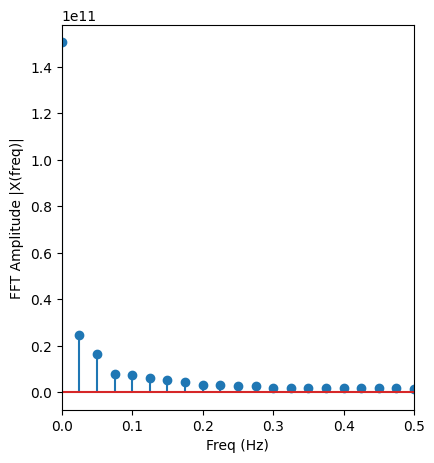

In [18]:
X = fft(df_train_test[nation_list[0]][0]['GDP'])
N = len(X)
Fs = 1
freq_step = Fs/N;
freq_vec = np.arange(0, Fs, freq_step)

plt.figure(figsize = (10, 5))
plt.subplot(121)

plt.stem(freq_vec, np.abs(X)/N)
plt.xlim(0, 0.5)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

## 7.2 Power-spectral density

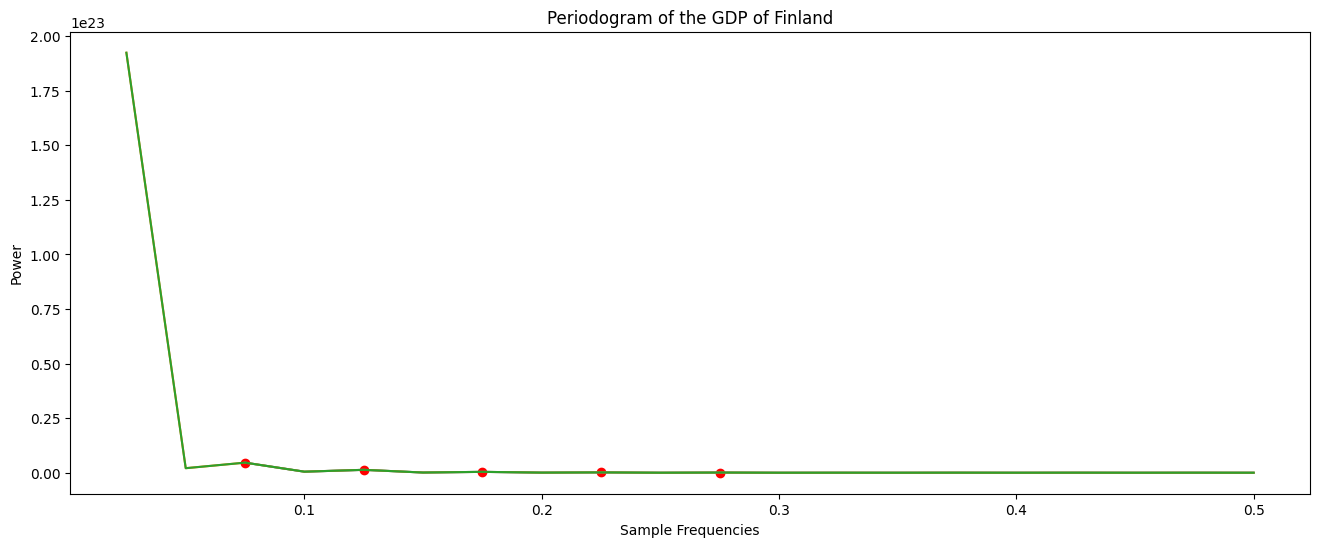

Frequency       Density     Period
0      0.075  4.616394e+21  13.333333
1      0.125  1.323946e+21   8.000000
2      0.175  3.951268e+20   5.714286
3      0.225  1.510196e+20   4.444444
4      0.275  8.303045e+19   3.636364

----------------------------------------------


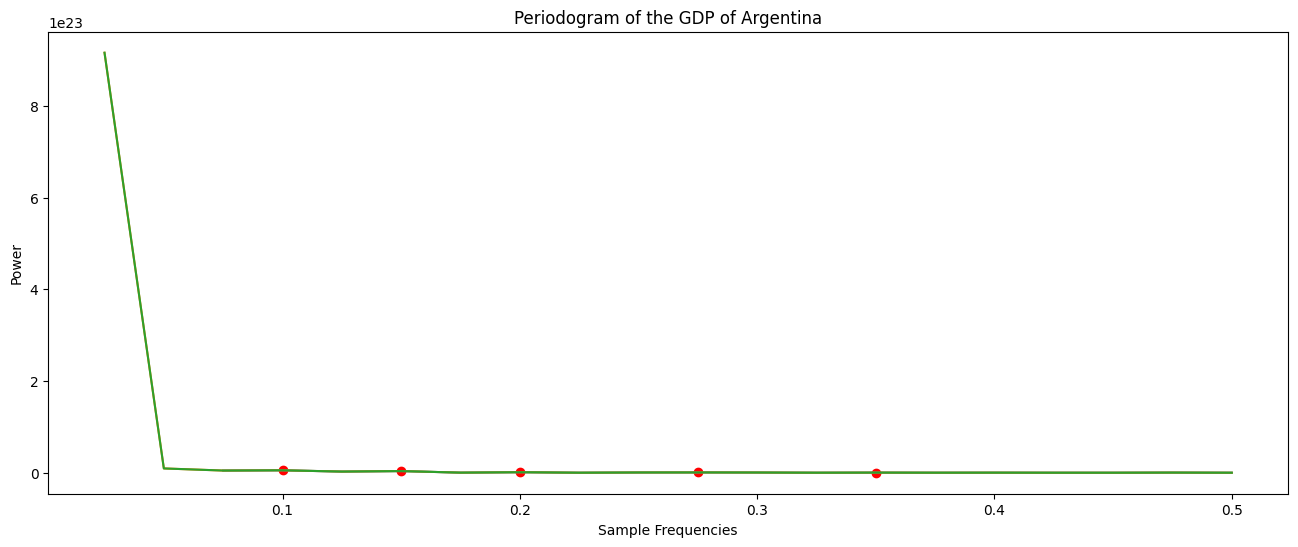

Frequency       Density     Period
0      0.100  5.293598e+21  10.000000
1      0.150  3.597535e+21   6.666667
2      0.200  1.106188e+21   5.000000
3      0.275  6.324115e+20   3.636364
4      0.350  2.649296e+20   2.857143

----------------------------------------------


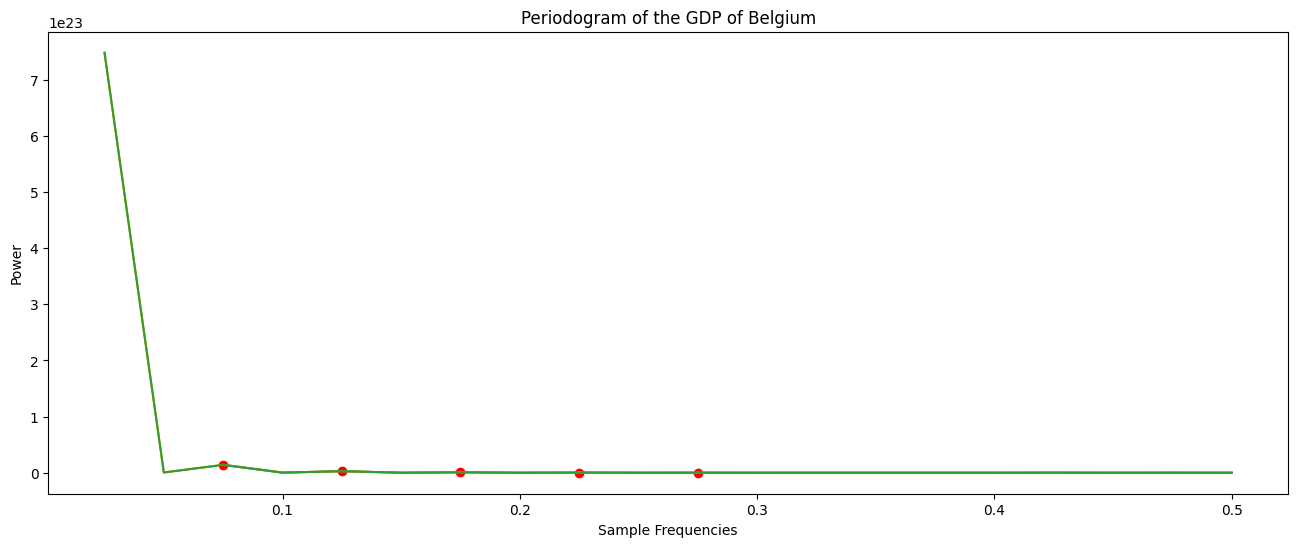

Frequency       Density     Period
0      0.075  1.400916e+22  13.333333
1      0.125  2.737009e+21   8.000000
2      0.175  7.785270e+20   5.714286
3      0.225  3.089728e+20   4.444444
4      0.275  9.780574e+19   3.636364

----------------------------------------------


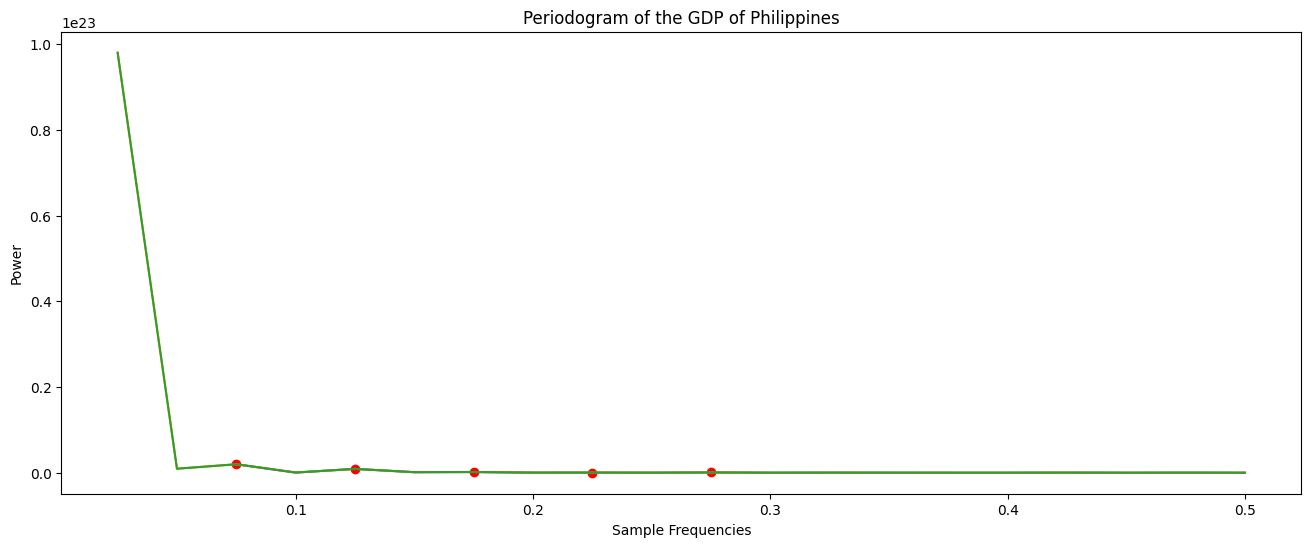

Frequency       Density     Period
0      0.075  1.976139e+21  13.333333
1      0.125  8.942455e+20   8.000000
2      0.175  1.669056e+20   5.714286
3      0.225  3.515580e+19   4.444444
4      0.275  6.814486e+19   3.636364

----------------------------------------------


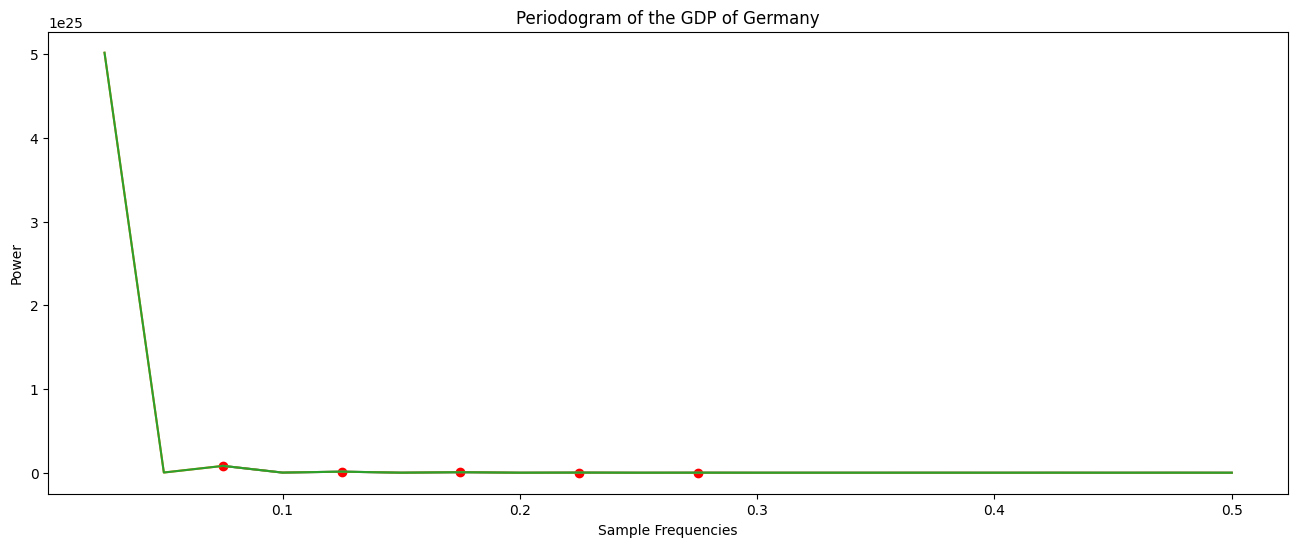

Frequency       Density     Period
0      0.075  8.167657e+23  13.333333
1      0.125  1.284873e+23   8.000000
2      0.175  6.251032e+22   5.714286
3      0.225  1.675840e+22   4.444444
4      0.275  6.289421e+21   3.636364

----------------------------------------------


In [19]:
seasons_list = []

for nation in nation_list:
    top_season = f.spd(nation, df_train_test, Fs)
    seasons_list.append(top_season)
    print('----------------------------------------------')

seasons_list = [round(x) for x in seasons_list]

# 8. Seasonal decompose

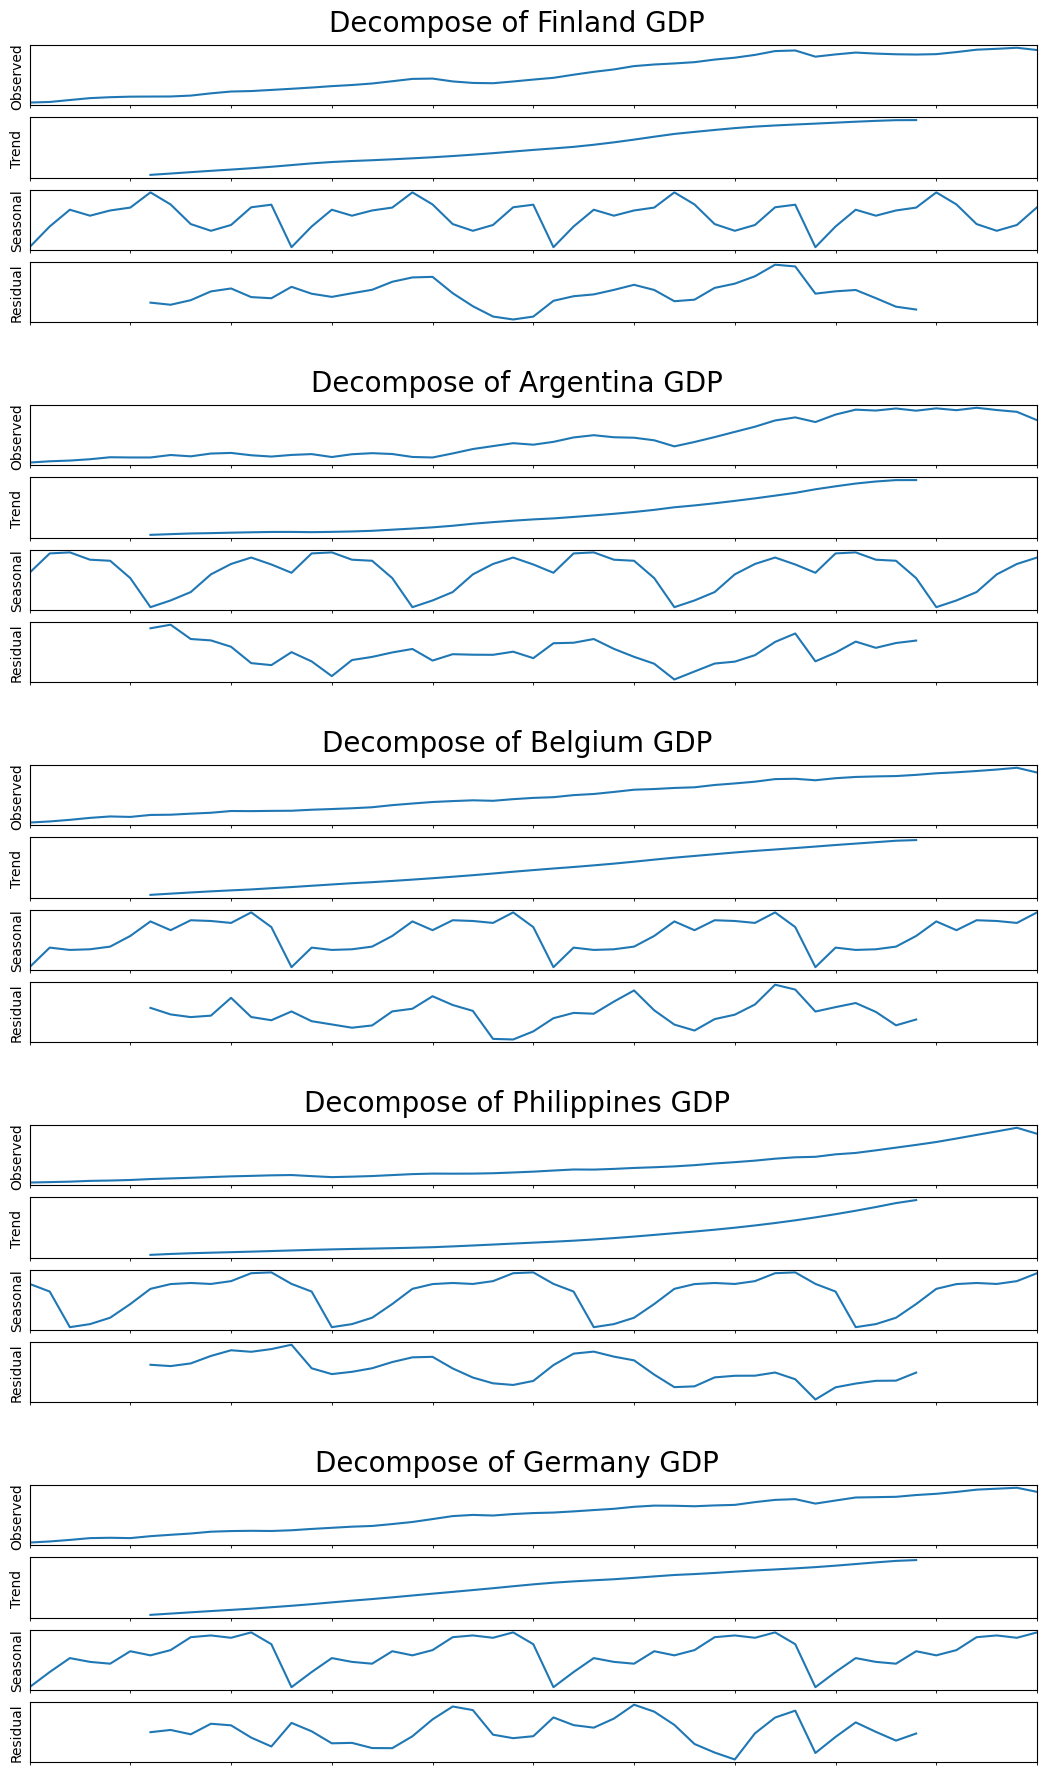

In [20]:
fig = plt.figure(figsize = (13, 18))

subfigs = fig.subfigures(5, 1)

for outerind, subfig in enumerate(subfigs.flat):
    decompose_data_add = seasonal_decompose(df_list[outerind]['GDP'], model = 'additive', period = seasons_list[idx])
    subfig.suptitle(f'Decompose of {nation_list[outerind]} GDP', fontsize = 20)
    axs = subfig.subplots(4, 1)
    f.plotseasonal(decompose_data_add, axs[:])
    for innerind, ax in enumerate(axs.flat):
        ax.set_xticks([])
        ax.set_yticks([])
 
plt.show()

# 9. Stationarity check

## 9.1 Visual stationarity

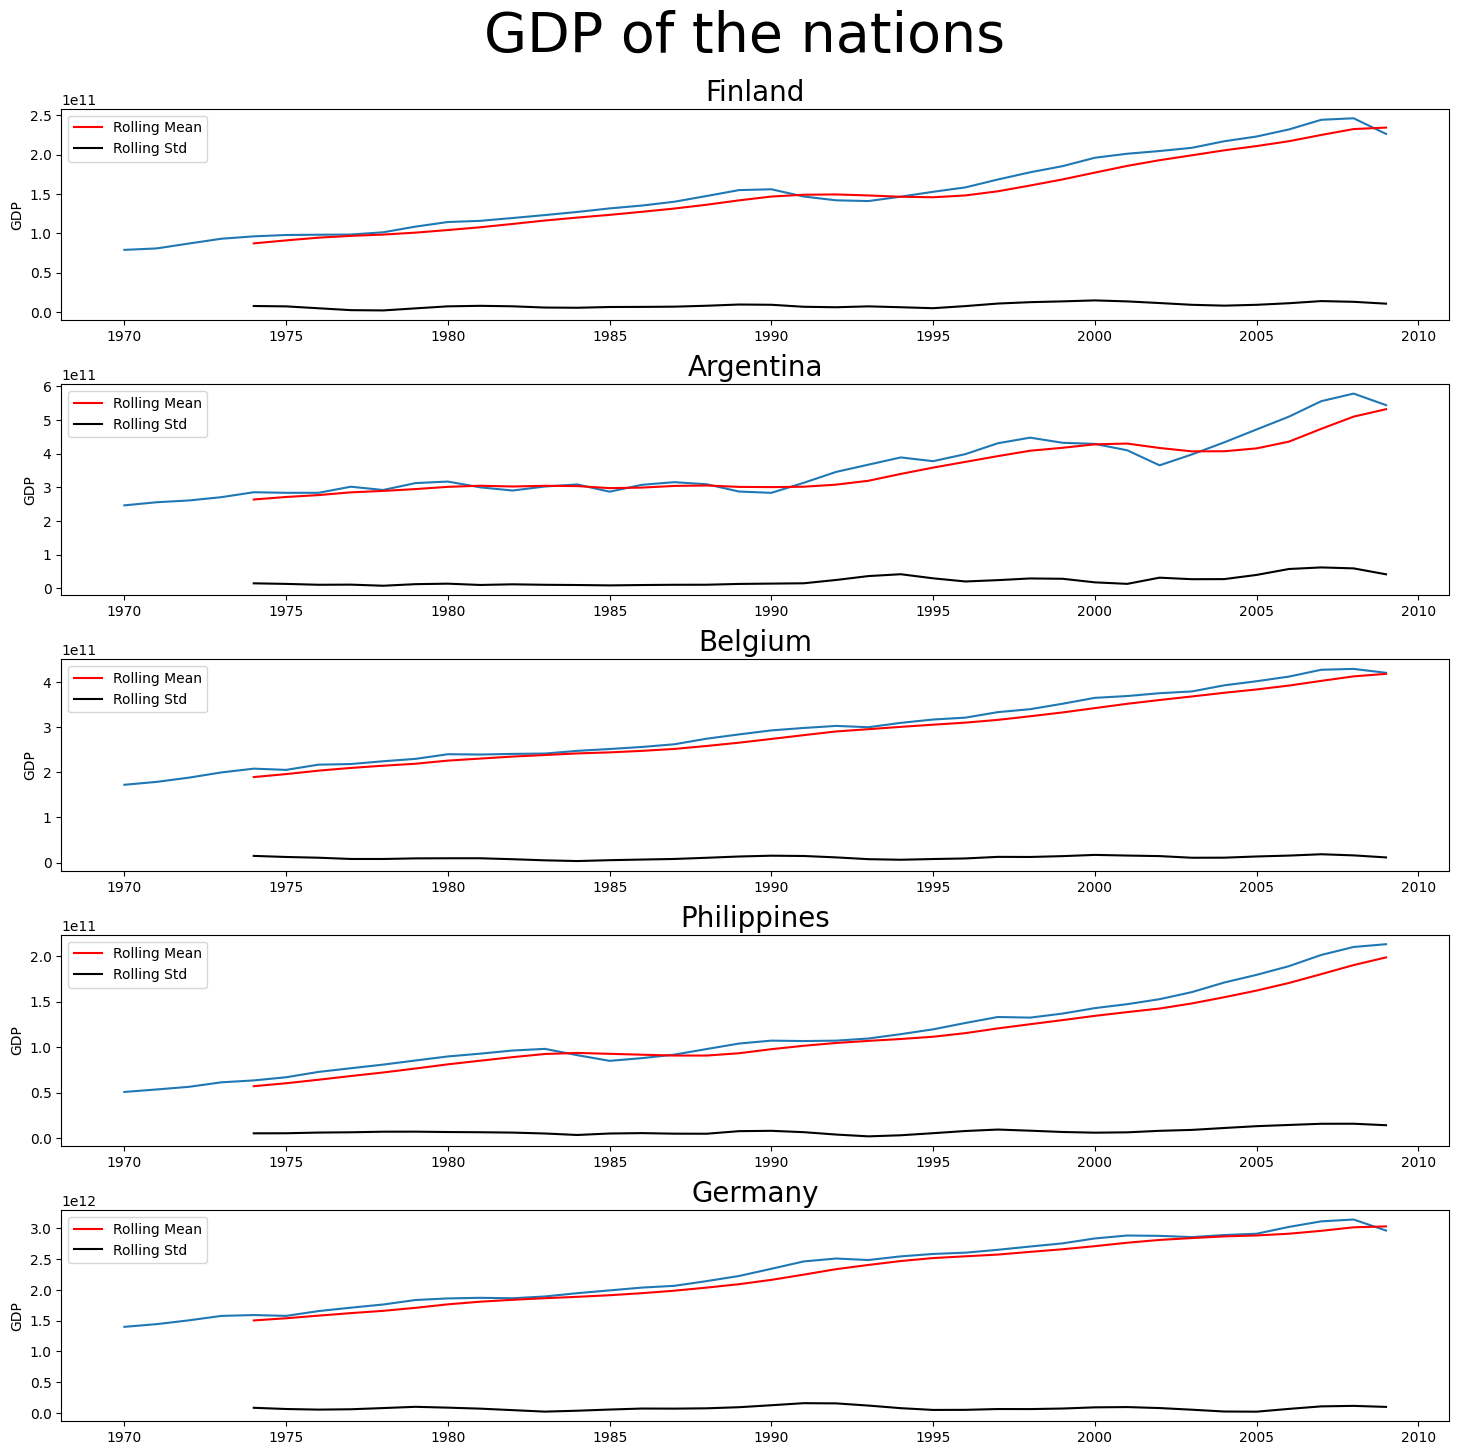

In [21]:
f.roll_mean_std_plot(df_train_test, nation_list, 5)

## 9.2 Statistics stationarity

In [22]:
f.check_stationarity(df_list, df_train_test, nation_list)

ADF  P-value for ADF ADF stationarity      KPSS  \
Finland     -0.466427         0.898403               No  0.871910   
Argentina    1.126831         0.995439               No  0.819012   
Belgium      0.165039         0.970231               No  0.899851   
Philippines  1.649507         0.997999               No  0.862955   
Germany     -1.036319         0.739788               No  0.901137   

             P-value for KPSS KPSS stationarity  
Finland                  0.01                No  
Argentina                0.01                No  
Belgium                  0.01                No  
Philippines              0.01                No  
Germany                  0.01                No

## 9.3 Achieving stationarity

df_train_test_log = {}

df_train_test_log = f.log_transform(df_train_test)

print('Stationarity check after log transform')
stationarity_df = f.check_stationarity(df_list, df_train_test_log, nation_list)
stationarity_df

In [23]:
df_train_test_log_dif = {}

for idx, nation in enumerate(nation_list):
    df_train_test_log_dif[nation] = f.difference(df_train_test, 1, nation)
    #print(f"Applied seasonal difference of {seasons_list[idx]} for {nation}'s GDP")

print('Stationarity check after first order differencing')
stationarity_df =  f.check_stationarity(df_list, df_train_test_log_dif, nation_list)
stationarity_df

Stationarity check after first order differencing


ADF  P-value for ADF ADF stationarity      KPSS  \
Finland     -3.358618         0.012453              Yes  0.076583   
Argentina   -3.981189         0.001512              Yes  0.134412   
Belgium     -4.769941         0.000062              Yes  0.108717   
Philippines -3.280826         0.015758              Yes  0.432859   
Germany     -3.564720         0.006472              Yes  0.153294   

             P-value for KPSS KPSS stationarity  
Finland              0.100000               Yes  
Argentina            0.100000               Yes  
Belgium              0.100000               Yes  
Philippines          0.062992               Yes  
Germany              0.100000               Yes

1. ADF AND KPSS indicate stationarity --> do nothing
2. ADF indicates stationarity and KPSS no --> first order differencing
3. KPSS indicates stationarity and ADF no --> detrend with seasonal_decompose
4. Both indicate non-stationarity --> first order differencing

df_train_test_log_dif_detrend = {}

for nation in nation_list:
    df_train_test_log_dif_detrend[nation] = f.difference(df_train_test_log, 1, nation)

print('Stationarity check after second order differencing')
f.check_stationarity(df_list, df_train_test_log_dif_detrend, nation_list)

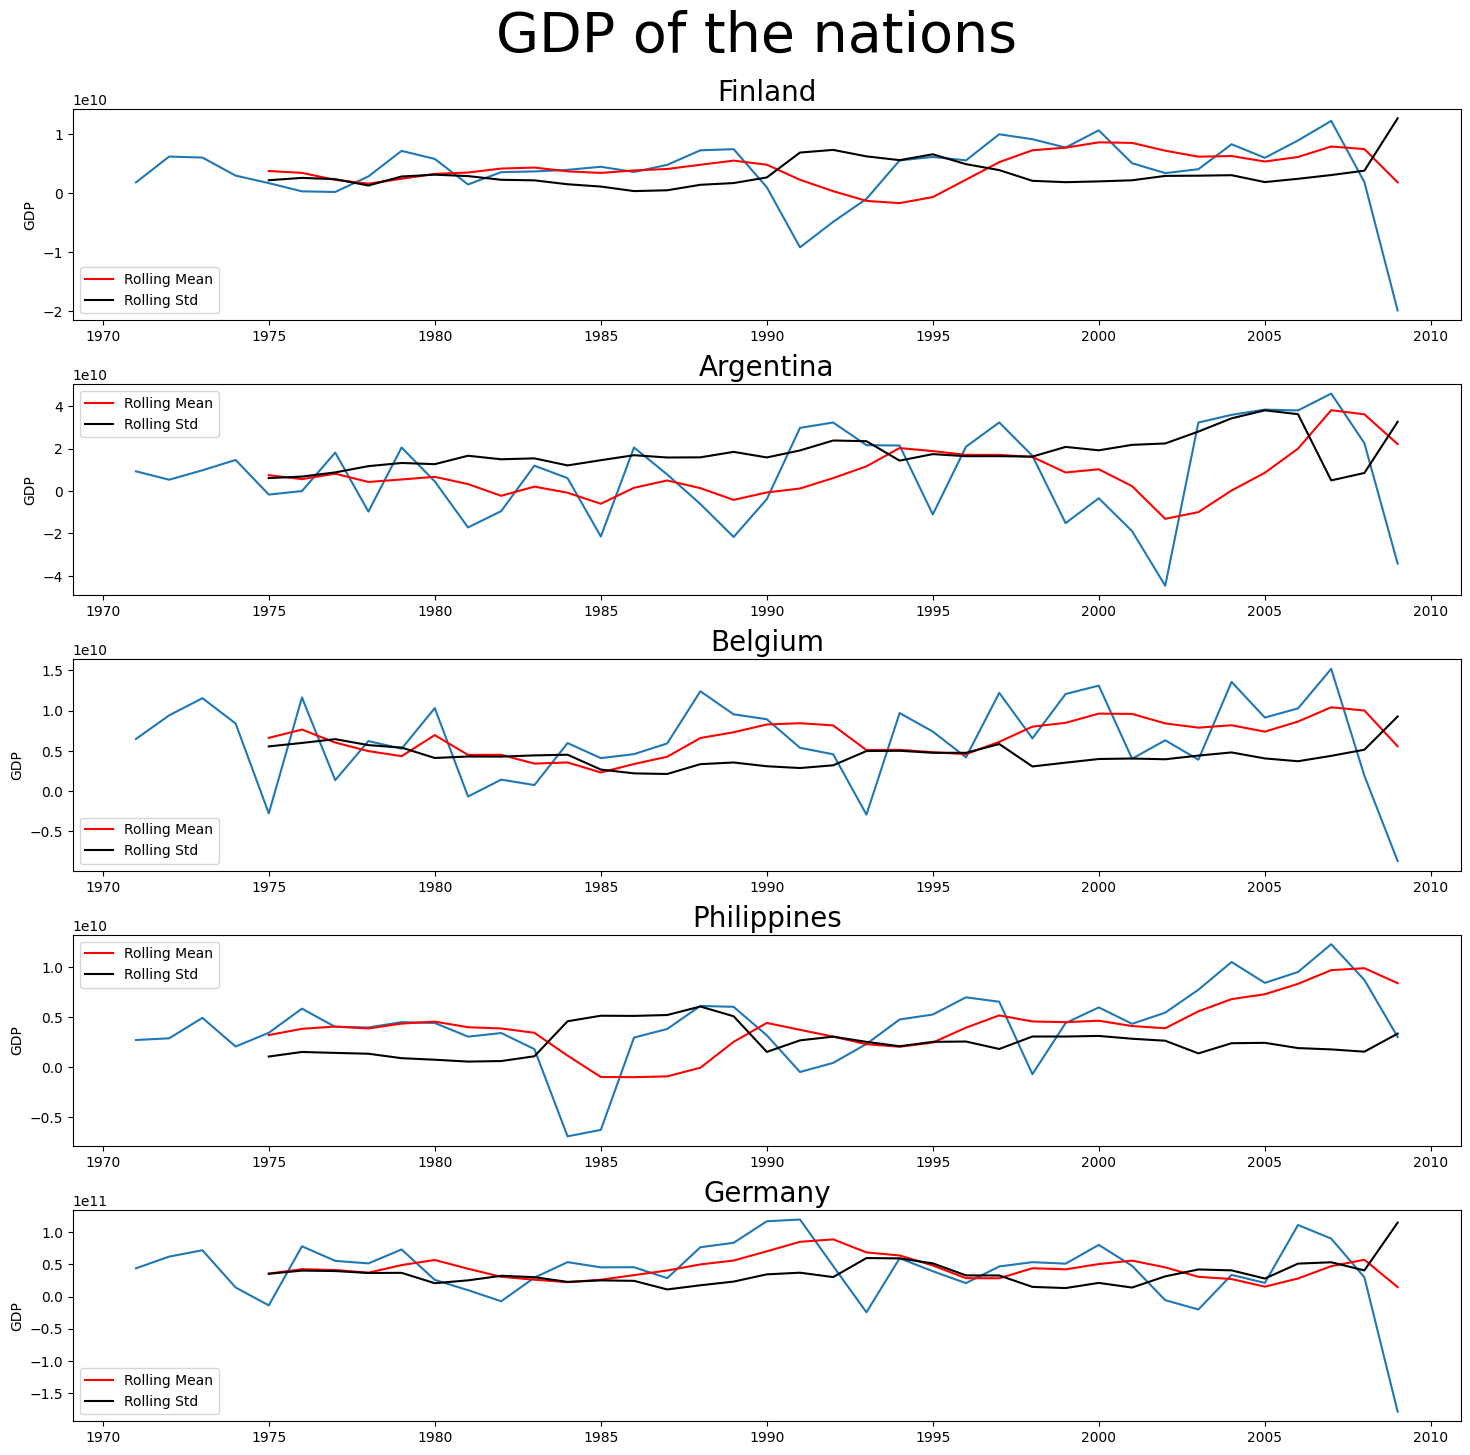

In [24]:
f.roll_mean_std_plot(df_train_test_log_dif, nation_list, 5)

## 9.4 ACF and PACF on differenced data

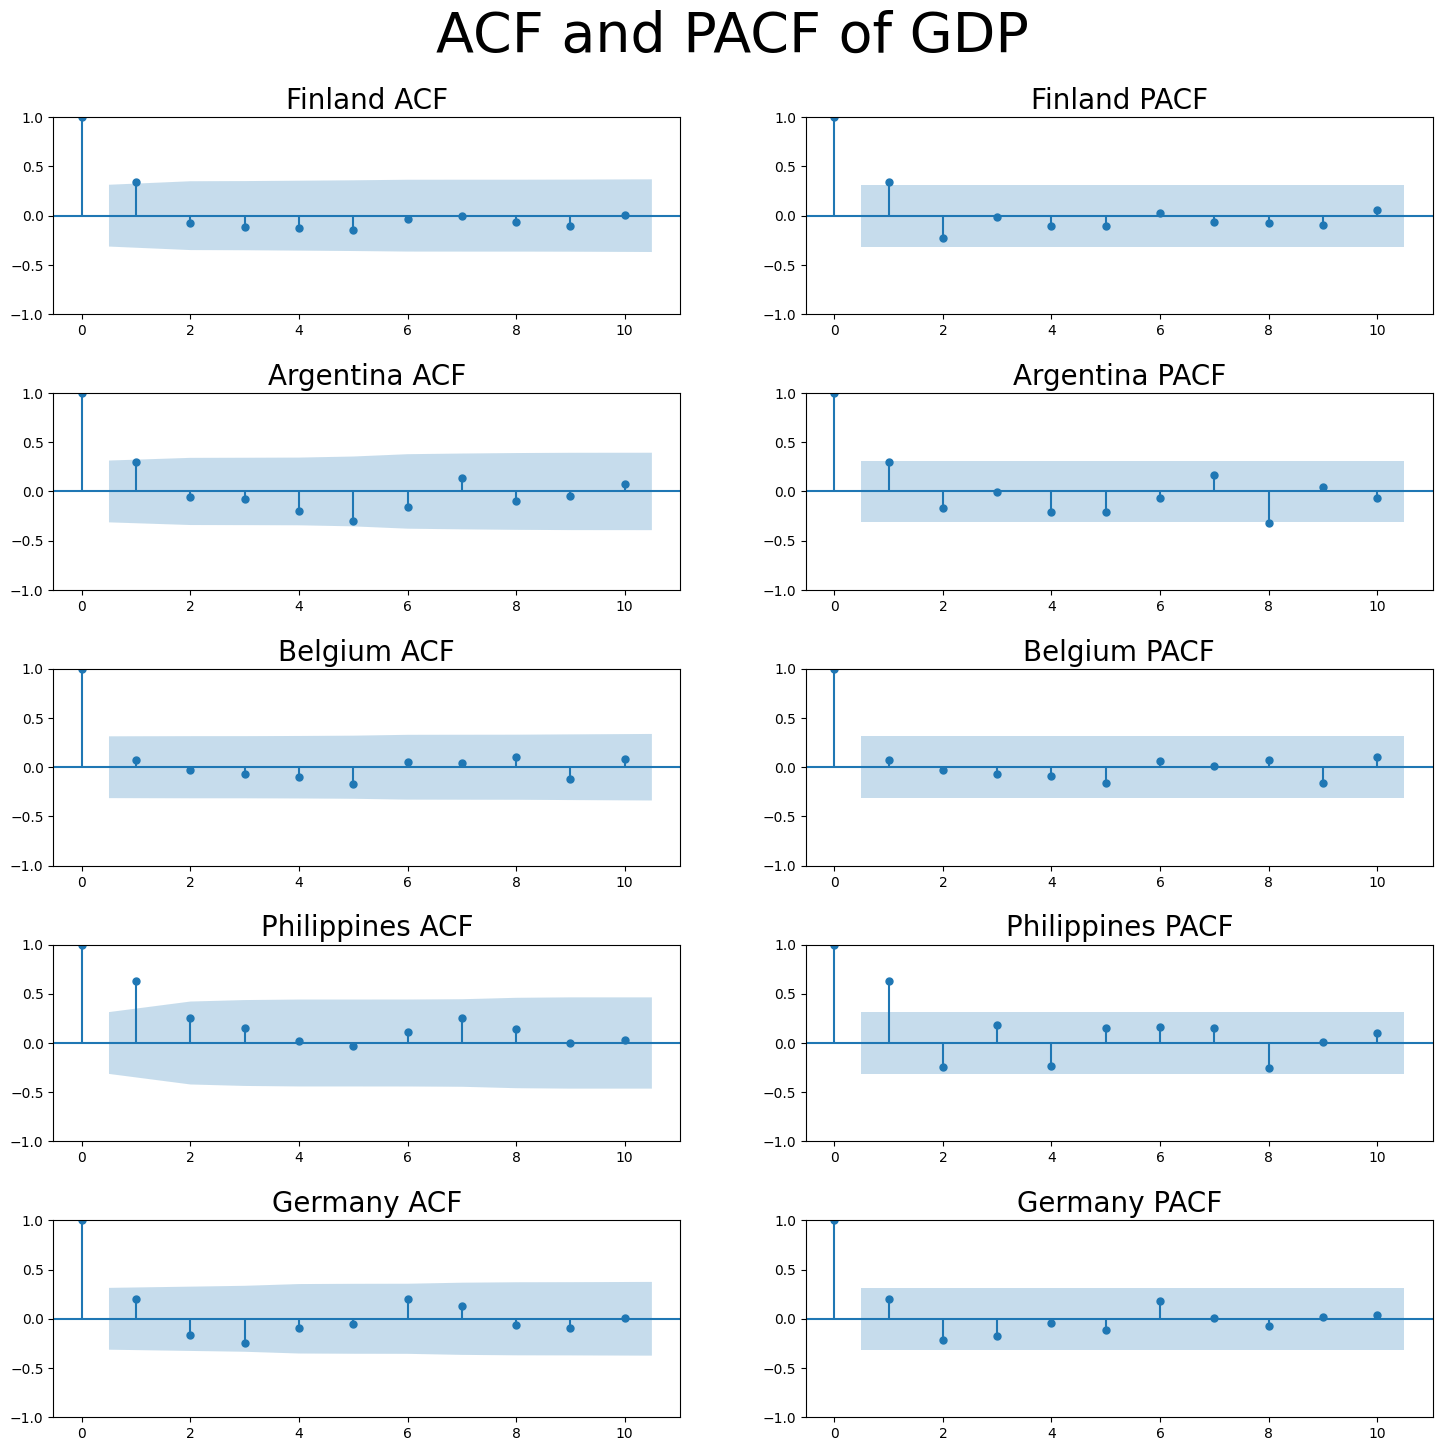

In [25]:
fig, ax = plt.subplots(5, 2, figsize = (15, 15))
plt.suptitle('ACF and PACF of GDP', fontsize = 40)
plt.tight_layout(pad = 2.8, h_pad = 1.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

for idx, df in enumerate(df_list):
    plot_acf(df_train_test_log_dif[nation_list[idx]][0]['GDP'], lags = 10, ax = ax[idx][0])
    ax[idx][0].set_title(f'{nation_list[idx]} ACF', fontsize = 20)
    plot_pacf(df_train_test_log_dif[nation_list[idx]][0]['GDP'], lags = 10, ax = ax[idx][1])
    ax[idx][1].set_title(f'{nation_list[idx]} PACF', fontsize = 20)

# 10. Models

## 10.0 Metrics

In [26]:
metrics_list_of_df = f.create_metrics_df()

for idx, df in enumerate(metrics_list_of_df):
    print(nation_list[idx])
    display(df)

Finland


Empty DataFrame
Columns: [Model_name, AIC, MAE, RMSE, MAPE]
Index: []

Argentina


Empty DataFrame
Columns: [Model_name, AIC, MAE, RMSE, MAPE]
Index: []

Belgium


Empty DataFrame
Columns: [Model_name, AIC, MAE, RMSE, MAPE]
Index: []

Philippines


Empty DataFrame
Columns: [Model_name, AIC, MAE, RMSE, MAPE]
Index: []

Germany


Empty DataFrame
Columns: [Model_name, AIC, MAE, RMSE, MAPE]
Index: []

## 10.1 Arimax

### 10.1.1 Model identification/estimation

In [27]:
order_list, arima_model_list = f.arima_order(nation_list, df_train_test)

Finland
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-138.384, Time=0.29 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-136.957, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-140.358, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-140.356, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-139.367, Time=0.24 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-143.544, Time=0.29 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-141.778, Time=0.31 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-140.502, Time=0.31 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-138.627, Time=0.39 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-145.699, Time=0.27 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-142.689, Time=0.16 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-144.095, Time=0.33 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-143.640, Time=0.42 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-144.506, Time=0.24 sec
 ARIMA(1,2,3)(0,0,0)[0]  

In [28]:
order_list

[(0, 2, 2), (0, 2, 1), (0, 2, 1), (1, 2, 1), (0, 2, 0)]

### 10.1.2 Model diagnostics

Summary and diagnostics for Finland's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(0, 2, 2)   Log Likelihood                  79.849
Date:                Mon, 20 Jan 2025   AIC                           -145.699
Time:                        09:20:43   BIC                           -134.236
Sample:                             0   HQIC                          -141.620
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1423      0.111      1.281      0.200      -0.075       0.360
x2            -0.1001      0.092     -1.091      0.275      -0.280       0.080
x

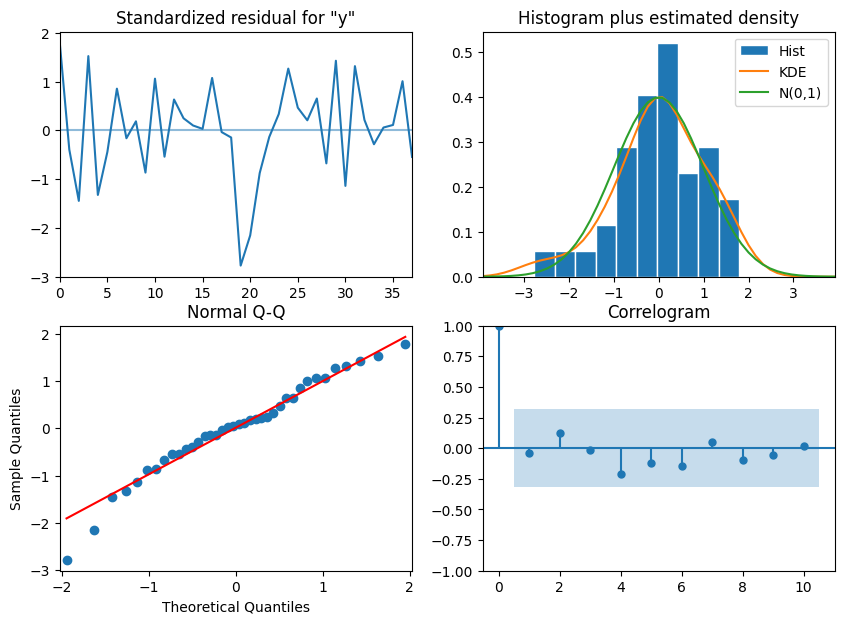

--------------------------------------
Summary and diagnostics for Argentina's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(0, 2, 1)   Log Likelihood                  53.483
Date:                Mon, 20 Jan 2025   AIC                            -94.967
Time:                        09:20:43   BIC                            -85.141
Sample:                             0   HQIC                           -91.471
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0241      0.073     -0.331      0.741      -0.167       0.119
x2             0.2141      0.080      2

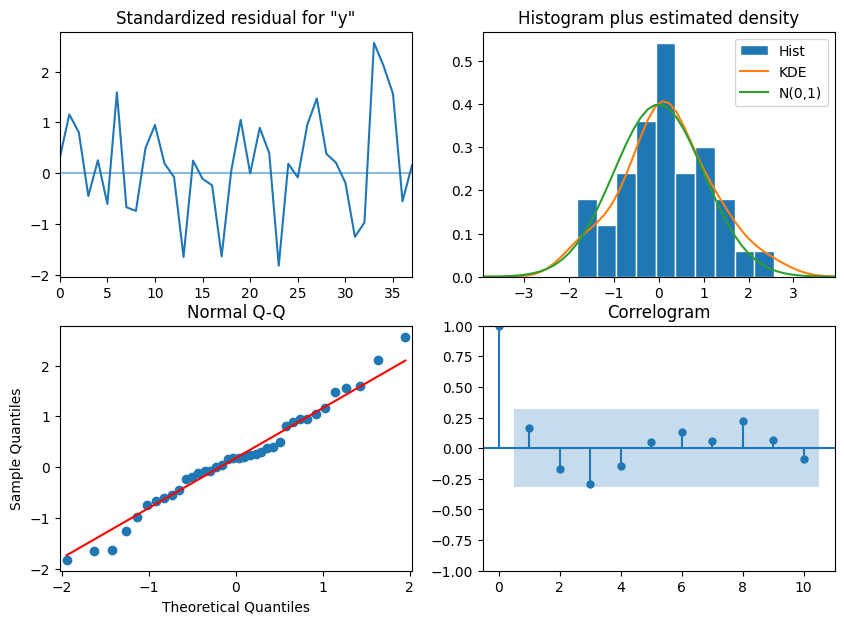

--------------------------------------
Summary and diagnostics for Belgium's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(0, 2, 1)   Log Likelihood                  88.283
Date:                Mon, 20 Jan 2025   AIC                           -164.565
Time:                        09:20:44   BIC                           -154.740
Sample:                             0   HQIC                          -161.069
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7543      0.183      4.123      0.000       0.396       1.113
x2            -0.6082      0.187     -3.2

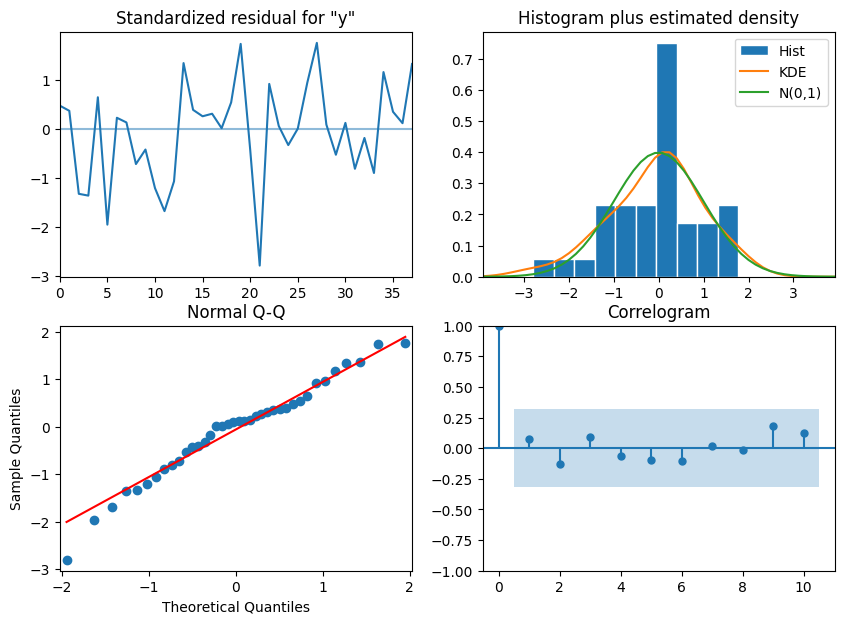

--------------------------------------
Summary and diagnostics for Philippines's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(1, 2, 1)   Log Likelihood                  76.398
Date:                Mon, 20 Jan 2025   AIC                           -138.797
Time:                        09:20:45   BIC                           -127.334
Sample:                             0   HQIC                          -134.718
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3246      0.045      7.163      0.000       0.236       0.413
x2            -0.4002      0.094     

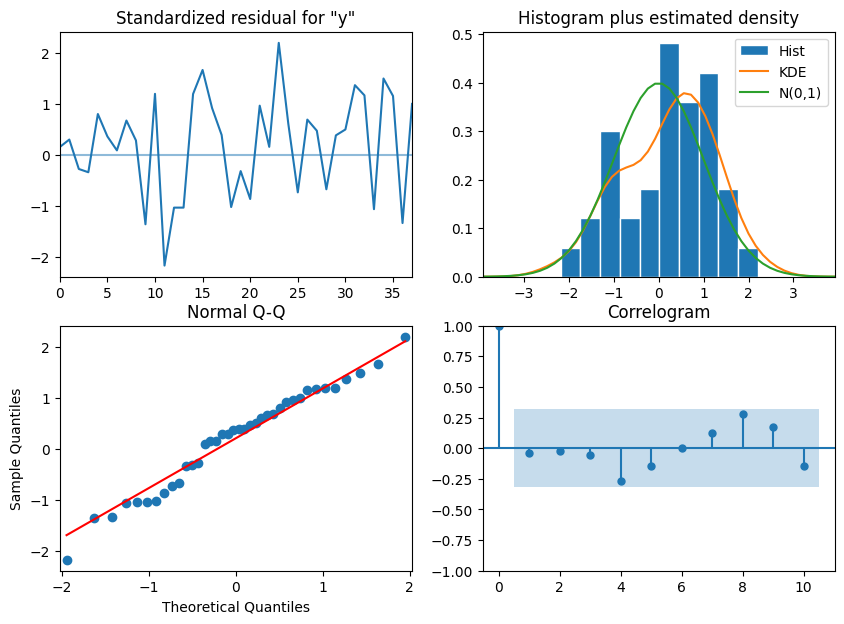

--------------------------------------
Summary and diagnostics for Germany's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(0, 2, 0)   Log Likelihood                  82.233
Date:                Mon, 20 Jan 2025   AIC                           -154.465
Time:                        09:20:46   BIC                           -146.277
Sample:                             0   HQIC                          -151.552
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3725      0.094      3.972      0.000       0.189       0.556
x2            -0.2156      0.096     -2.2

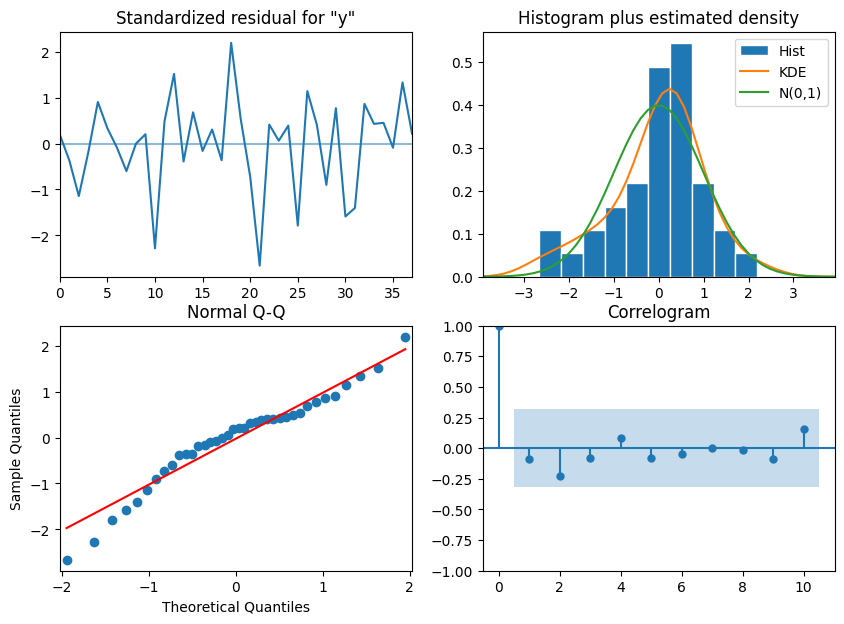

--------------------------------------


In [29]:
f.arima_diagnostics(arima_model_list, nation_list)

Summary and diagnostics for Finland's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(0, 2, 2)   Log Likelihood                  79.849
Date:                Mon, 20 Jan 2025   AIC                           -145.699
Time:                        09:20:47   BIC                           -134.236
Sample:                             0   HQIC                          -141.620
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1423      0.111      1.281      0.200      -0.075       0.360
x2            -0.1001      0.092     -1.091      0.275      -0.280       0.080
x

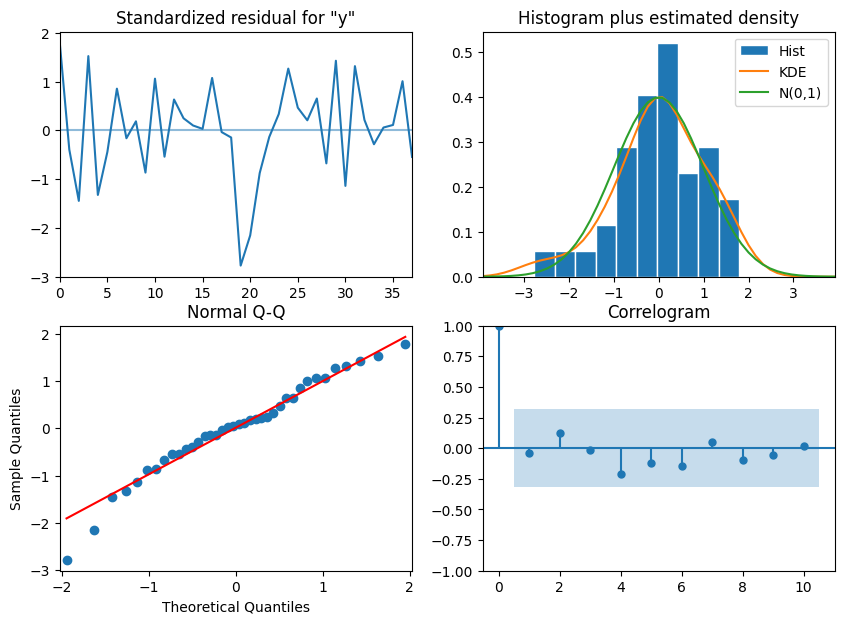

--------------------------------------
Summary and diagnostics for Argentina's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(0, 2, 1)   Log Likelihood                  53.483
Date:                Mon, 20 Jan 2025   AIC                            -94.967
Time:                        09:20:47   BIC                            -85.141
Sample:                             0   HQIC                           -91.471
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0241      0.073     -0.331      0.741      -0.167       0.119
x2             0.2141      0.080      2

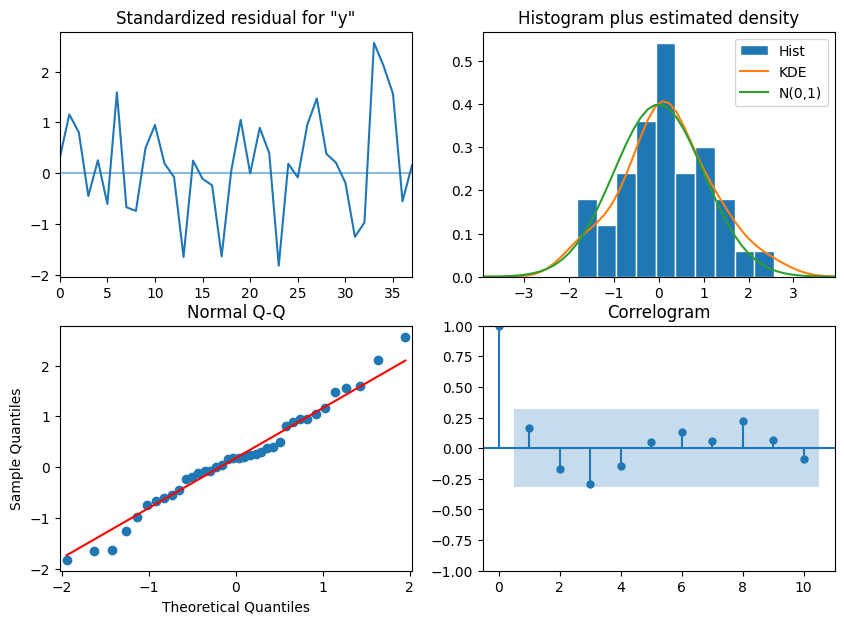

--------------------------------------
Summary and diagnostics for Belgium's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(0, 2, 1)   Log Likelihood                  88.283
Date:                Mon, 20 Jan 2025   AIC                           -164.565
Time:                        09:20:48   BIC                           -154.740
Sample:                             0   HQIC                          -161.069
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7543      0.183      4.123      0.000       0.396       1.113
x2            -0.6082      0.187     -3.2

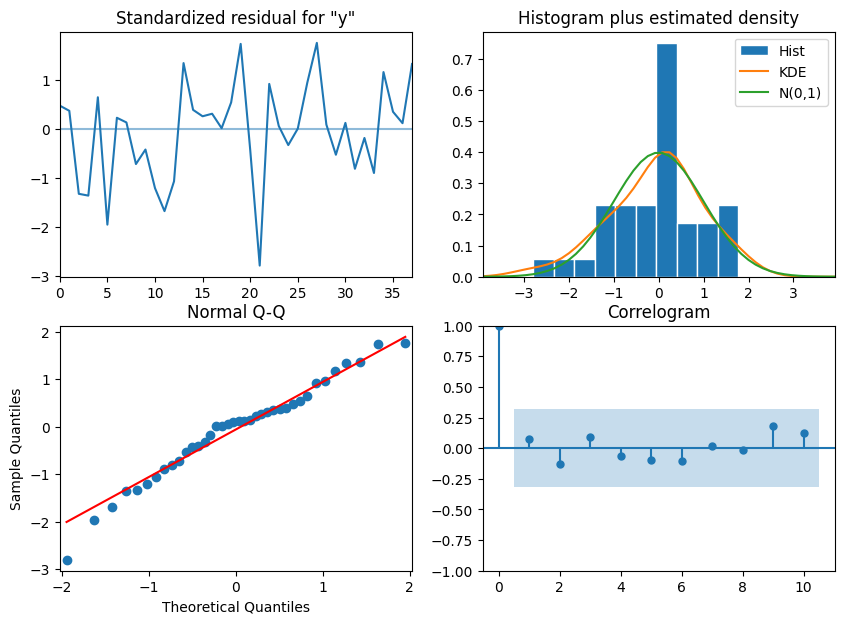

--------------------------------------
Summary and diagnostics for Philippines's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(1, 2, 1)   Log Likelihood                  76.398
Date:                Mon, 20 Jan 2025   AIC                           -138.797
Time:                        09:20:49   BIC                           -127.334
Sample:                             0   HQIC                          -134.718
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3246      0.045      7.163      0.000       0.236       0.413
x2            -0.4002      0.094     

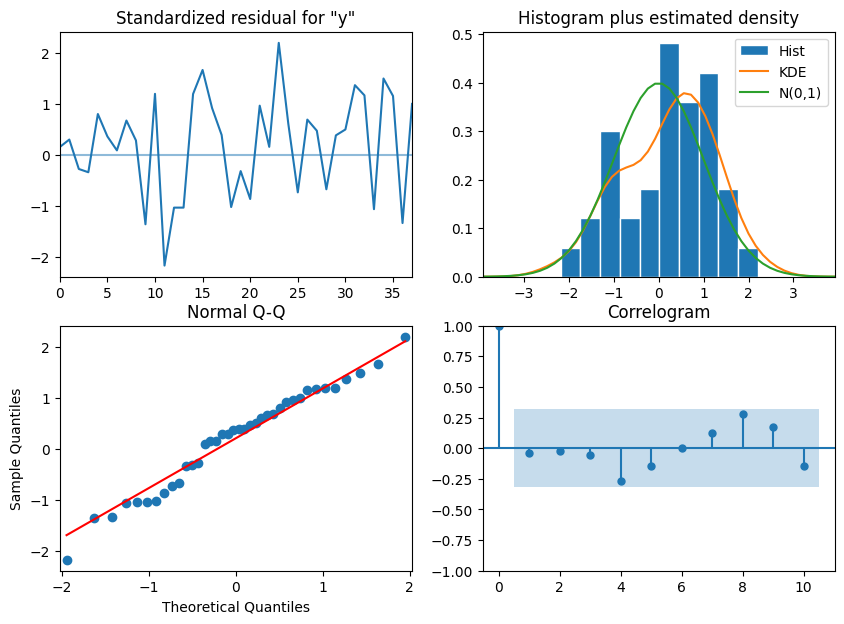

--------------------------------------
Summary and diagnostics for Germany's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(0, 2, 0)   Log Likelihood                  82.233
Date:                Mon, 20 Jan 2025   AIC                           -154.465
Time:                        09:20:49   BIC                           -146.277
Sample:                             0   HQIC                          -151.552
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3725      0.094      3.972      0.000       0.189       0.556
x2            -0.2156      0.096     -2.2

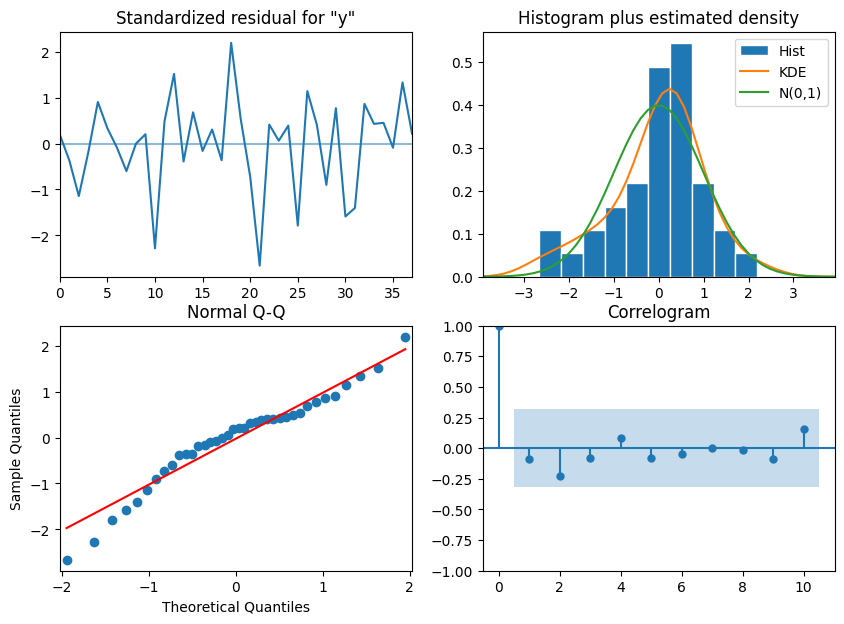

--------------------------------------
DW statistic for standardized residuals of Finland's model: 2.062663442865388


lb_stat  lb_pvalue
1   0.055371   0.813968
2   0.773623   0.679219
3   0.777937   0.854737
4   2.856289   0.582156
5   3.553776   0.615267
6   4.577669   0.599002
7   4.714306   0.694781
8   5.186518   0.737467
9   5.360011   0.801864
10  5.373239   0.864893

JB p-value for standardized residuals of Finland's model: (useless, too few samples) 0.23260500158664985
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Argentina's model: 1.6096621979733563


lb_stat  lb_pvalue
1    1.227183   0.267956
2    2.536779   0.281284
3    6.585215   0.086362
4    7.630185   0.106104
5    7.778035   0.168900
6    8.690692   0.191735
7    8.850267   0.263586
8   11.404711   0.179805
9   11.679790   0.231969
10  12.122776   0.276924

JB p-value for standardized residuals of Argentina's model: (useless, too few samples) 0.9212474429557511
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Belgium's model: 1.7909414154671057


lb_stat  lb_pvalue
1   0.248943   0.617821
2   0.999362   0.606724
3   1.398328   0.705927
4   1.601909   0.808449
5   2.074567   0.838734
6   2.647689   0.851587
7   2.655700   0.914924
8   2.666789   0.953499
9   4.508025   0.874917
10  5.387663   0.863825

JB p-value for standardized residuals of Belgium's model: (useless, too few samples) 0.42001512634142324
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Philippines's model: 1.9645234518163182


lb_stat  lb_pvalue
1    0.050749   0.821765
2    0.081155   0.960235
3    0.224860   0.973480
4    3.484179   0.480288
5    4.529826   0.475903
6    4.530844   0.605228
7    5.270957   0.626935
8    9.249328   0.321702
9   10.812317   0.288793
10  11.850335   0.295198

JB p-value for standardized residuals of Philippines's model: (useless, too few samples) 0.6312759484851778
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Germany's model: 2.1689375363949264


lb_stat  lb_pvalue
1   0.316932   0.573457
2   2.553102   0.278998
3   2.864190   0.413042
4   3.198206   0.525221
5   3.495727   0.624034
6   3.588139   0.732209
7   3.588148   0.825803
8   3.598244   0.891433
9   4.046185   0.908346
10  5.414448   0.861831

JB p-value for standardized residuals of Germany's model: (useless, too few samples) 0.1871173383736967
-------------------------------------------------------------------------------


In [ ]:
f.res_stats(arima_model_list, nation_list, df_train_test)

### 10.1.3 Model prediction

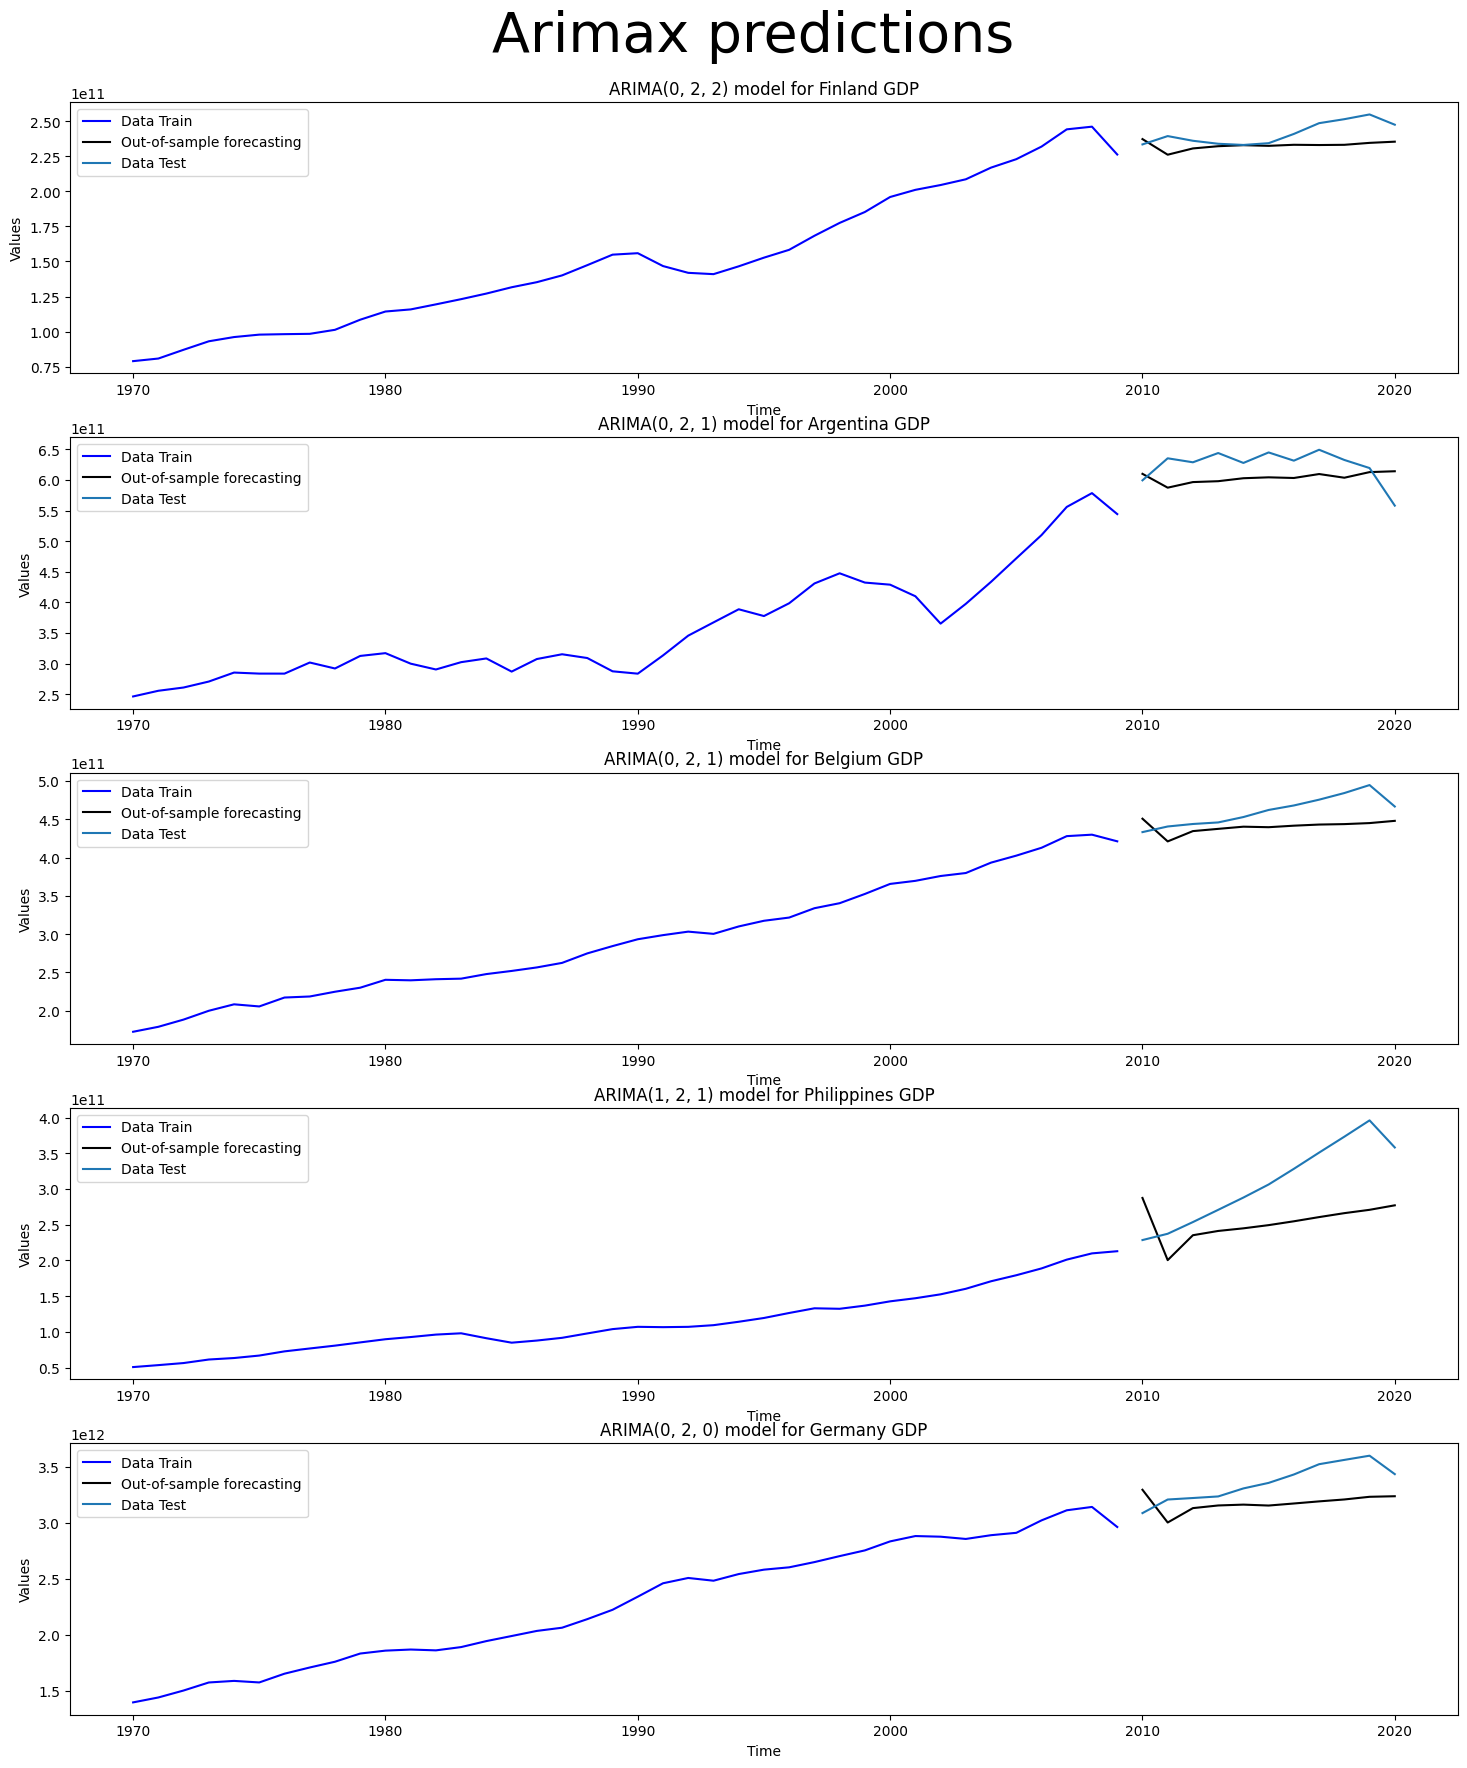

In [31]:
arima_prediction_list = f.arima_prediction_plot(arima_model_list, nation_list, order_list, df_train_test)

In [32]:
metrics_list_of_df = f.add_metrics('ARIMAX', arima_model_list, metrics_list_of_df, df_train_test, nation_list, arima_prediction_list)

for idx, df in enumerate(metrics_list_of_df):
    print(nation_list[idx])
    display(df)

Finland


Model_name         AIC                MAE                RMSE     MAPE
0     ARIMAX -145.698941  9129753769.205559  11379151749.569609  0.03703

Argentina


Model_name        AIC                 MAE                RMSE      MAPE
0     ARIMAX -94.966798  32925103988.582153  35997371805.990555  0.052888

Belgium


Model_name         AIC                 MAE                RMSE      MAPE
0     ARIMAX -164.565158  23411215857.833481  26486951102.288128  0.049975

Philippines


Model_name         AIC                 MAE                RMSE      MAPE
0     ARIMAX -138.796641  65550276737.694511  72878818049.257492  0.203683

Germany


Model_name        AIC                  MAE                 RMSE      MAPE
0     ARIMAX -154.46529  221597836767.304688  240551789171.569183  0.065097

## 10.2 ETS

### 10.2.1 Model identification

finland MAM 8 false

argentina MAM 7 true

belgium AAM 13 false

philippines MMM 8 false

germany AMM 13 true


In [33]:
ets_model_list, ets_params = f.ets_order(df_train_test, nation_list)

In [34]:
ets_params

Error Trend Seasonal  Seasonal period  Damped trend
Finland       mul   add      add               12         False
Argentina     mul   mul      add               10         False
Belgium       add   add      mul                2         False
Philippines   add   mul      mul                8         False
Germany       mul   mul      mul               13         False

### 10.2.2 Model diagnostics

In [35]:
f.res_stats(ets_model_list, nation_list, df_train_test)

DW statistic for standardized residuals of Finland's model: 0.6744527500377289


lb_stat  lb_pvalue
1   5.474416   0.019297
2   5.480115   0.064567
3   5.538142   0.136375
4   5.616406   0.229685
5   5.698898   0.336628
6   5.722217   0.455016
7   5.741776   0.570204
8   6.123919   0.633353
9   8.249922   0.509170
10  8.335256   0.596125

JB p-value for standardized residuals of Finland's model: (useless, too few samples) 4.834619760652476e-27
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Argentina's model: 1.2661412398179428


lb_stat  lb_pvalue
1    3.939281   0.047171
2    4.653074   0.097633
3    4.787684   0.188021
4    6.805127   0.146552
5   14.092902   0.015030
6   15.434752   0.017132
7   15.526829   0.029809
8   16.007096   0.042279
9   16.029686   0.066264
10  19.725698   0.031957

JB p-value for standardized residuals of Argentina's model: (useless, too few samples) 0.2175914472638675
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Belgium's model: 1.5790224777719104


lb_stat  lb_pvalue
1   0.156237   0.692645
2   0.885407   0.642298
3   1.350687   0.717134
4   3.140866   0.534535
5   3.196928   0.669655
6   3.348971   0.763943
7   3.894602   0.791834
8   4.088723   0.849031
9   4.568957   0.870150
10  4.599196   0.916296

JB p-value for standardized residuals of Belgium's model: (useless, too few samples) 0.29086648821763267
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Philippines's model: 1.9783029887310442


lb_stat  lb_pvalue
1    0.000086   0.992603
2    2.596388   0.273024
3    3.017424   0.388946
4    3.259222   0.515419
5    3.422357   0.635167
6    3.694004   0.718005
7    6.584588   0.473373
8    9.012321   0.341258
9   13.181571   0.154561
10  13.185571   0.213481

JB p-value for standardized residuals of Philippines's model: (useless, too few samples) 4.128102367185887e-06
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Germany's model: 1.191787692763207


lb_stat  lb_pvalue
1   0.123082   0.725715
2   0.791945   0.673025
3   2.081478   0.555669
4   2.148037   0.708553
5   3.243024   0.662575
6   3.247008   0.777267
7   3.297275   0.856208
8   3.387744   0.907725
9   4.521235   0.873890
10  4.564703   0.918299

JB p-value for standardized residuals of Germany's model: (useless, too few samples) 4.8214365538808245e-87
-------------------------------------------------------------------------------


### 10.2.3 Model prediction

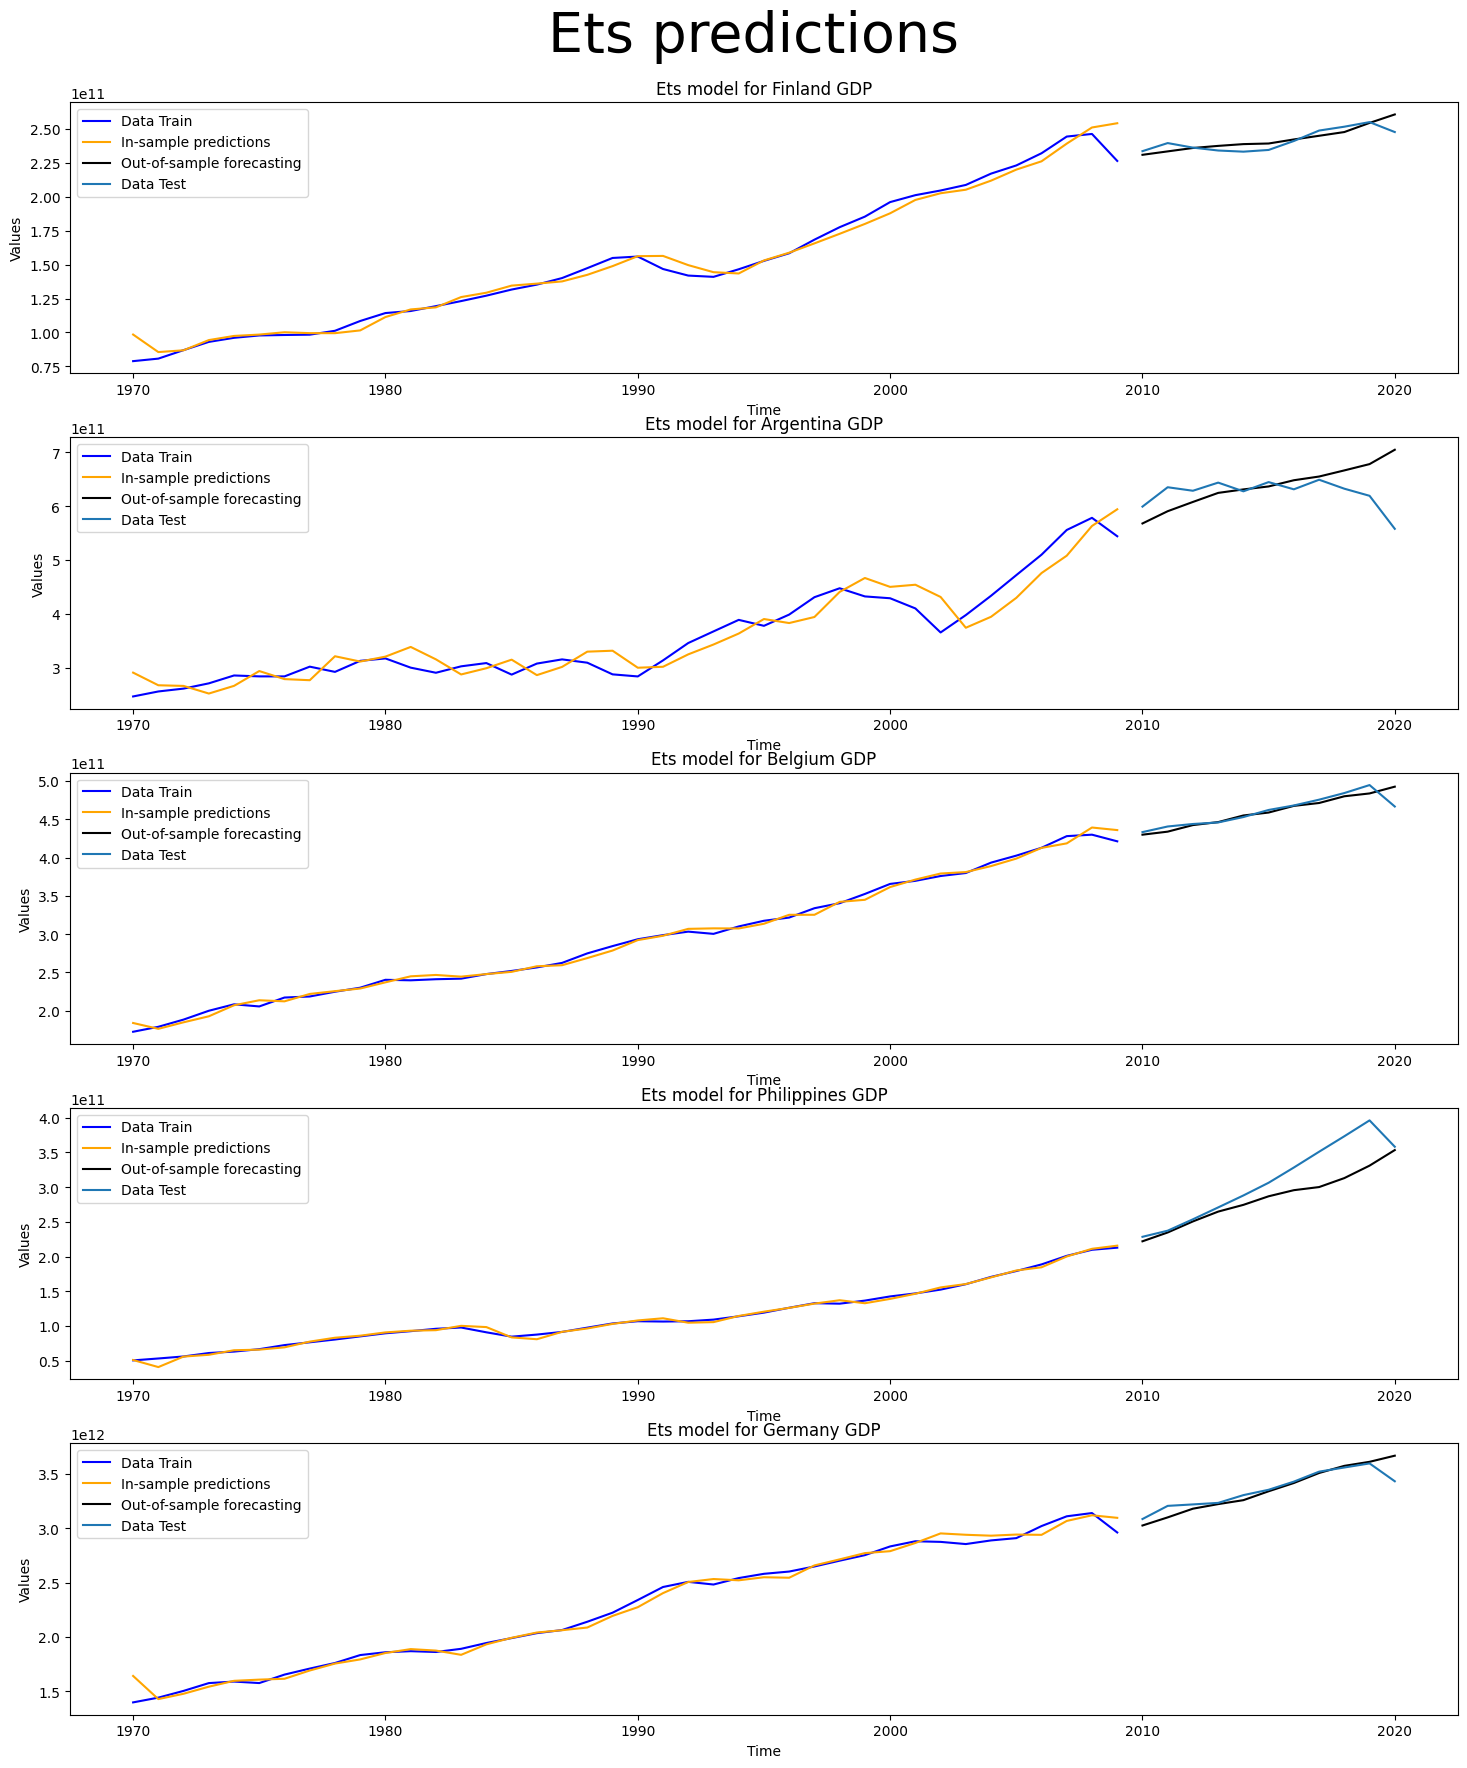

In [36]:
ets_prediction_list = f.ets_prediction_plot(ets_model_list, nation_list, df_train_test)

In [37]:
metrics_list_of_df = f.add_metrics('ETS', ets_model_list, metrics_list_of_df, df_train_test, nation_list, ets_prediction_list)

for idx, df in enumerate(metrics_list_of_df):
    print(nation_list[idx])
    display(df)

Finland


Model_name          AIC                MAE                RMSE     MAPE
0     ARIMAX  -145.698941  9129753769.205559  11379151749.569609  0.03703
0        ETS  1956.542285  4117085592.005557   5307628891.079964  0.01704

Argentina


Model_name          AIC                 MAE                RMSE      MAPE
0     ARIMAX   -94.966798  32925103988.582153  35997371805.990555  0.052888
0        ETS  2065.623252  35467574183.051682  52557579312.480186  0.059223

Belgium


Model_name          AIC                 MAE                RMSE      MAPE
0     ARIMAX  -164.565158  23411215857.833481  26486951102.288128  0.049975
0        ETS  1922.138979   5752710773.982644   9054250888.633696  0.012326

Philippines


Model_name          AIC                 MAE                RMSE      MAPE
0     ARIMAX  -138.796641  65550276737.694511  72878818049.257492  0.203683
0        ETS  1894.700817   24070536622.18869  33306789146.197868  0.069743

Germany


Model_name          AIC                  MAE                 RMSE      MAPE
0     ARIMAX   -154.46529  221597836767.304688  240551789171.569183  0.065097
0        ETS  2142.833062   51543010795.634499    82608490133.22438  0.015487

## 10.3 Vector Autoregressive

### 10.3.1 Model identification

In [27]:
grangers_col_list = f.grangers_causation_columns(df_train_test_log_dif, nation_list)

Finland
Best columns: ['Exports', 'Gross_capital', 'GDP']
Argentina
Best columns: ['Imports', 'Manufacturing', 'Gross_capital', 'GDP']
Belgium
Best columns: ['Exports', 'Imports', 'Manufacturing', 'Gross_capital', 'GDP']
Philippines
Best columns: ['Exports', 'Imports', 'Manufacturing', 'Gross_capital', 'GDP']
Germany
Best columns: ['Manufacturing', 'Gross_capital', 'GDP']


In [39]:
varmax_order, varmax_model_list = f.varmax_order(df_train_test_log_dif, nation_list, grangers_col_list)

Processing nation: Finland


Best order for Finland: (p, q)=(2, 1), AIC=5435.532416642322
Processing nation: Argentina
Best order for Argentina: (p, q)=(1, 1), AIC=7383.710097984742
Processing nation: Belgium
Best order for Belgium: (p, q)=(1, 1), AIC=9053.492805589281
Processing nation: Philippines
Best order for Philippines: (p, q)=(1, 1), AIC=8870.956580144908
Processing nation: Germany
Best order for Germany: (p, q)=(1, 2), AIC=5893.014061632468


In [28]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [29]:
varmax_order = [[2, 1], [1, 1], [1, 1], [1, 1], [1, 2]]

In [30]:
varmax_model_list = []
for idx, nation in enumerate(nation_list):
    model = VARMAX(df_train_test_log_dif[nation][0][grangers_col_list[idx]],
                            order=(varmax_order[idx][0], varmax_order[idx][1])
                        ).fit(disp=False)
    varmax_model_list.append(model)

### 10.3.2 Model diagnostics

In [ ]:
f.arima_diagnostics(varmax_model_list, nation_list)

In [ ]:
f.res_stats(varmax_model_list, nation_list, df_train_test_log_dif)

### 10.3.3 Model prediction

In [41]:
def varma_prediction_plot(varma_model_list, nation_list, order_list, df_train_test):
    varma_prediction_list = []
    fig, ax = plt.subplots(5, 1, figsize = (15, 18))
    plt.suptitle('Varma predictions', fontsize = 40)
    plt.tight_layout(pad = 2.5)

    for idx, model in enumerate(varma_model_list):
        prediction = model.get_prediction(start = '2010', end = '2020')
        df_pred = prediction.summary_frame()
        varma_prediction_list.append(df_pred['mean'])
        #ax[idx].figure(figsize = (15, 5))
        ax[idx].set_title(f'Varma{order_list[idx]} model for {nation_list[idx]} GDP')

        ax[idx].plot(df_train_test[nation_list[idx]][0]['GDP'], '-b', label = 'Data Train')
        #plt.plot(df_train_test['Finland'][0]['GDP'].index, inverse_fitted, 'orange', label = 'In-sample predictions')
        ax[idx].plot(df_pred['mean'],'-k',label = 'Out-of-sample forecasting')
        ax[idx].plot(df_train_test[nation_list[idx]][1]['GDP'], label = 'Data Test')

        ax[idx].set_xlabel('Time')
        ax[idx].set_ylabel('Values')
        ax[idx].legend(loc = 'upper left')

    plt.show()
    return varma_prediction_list

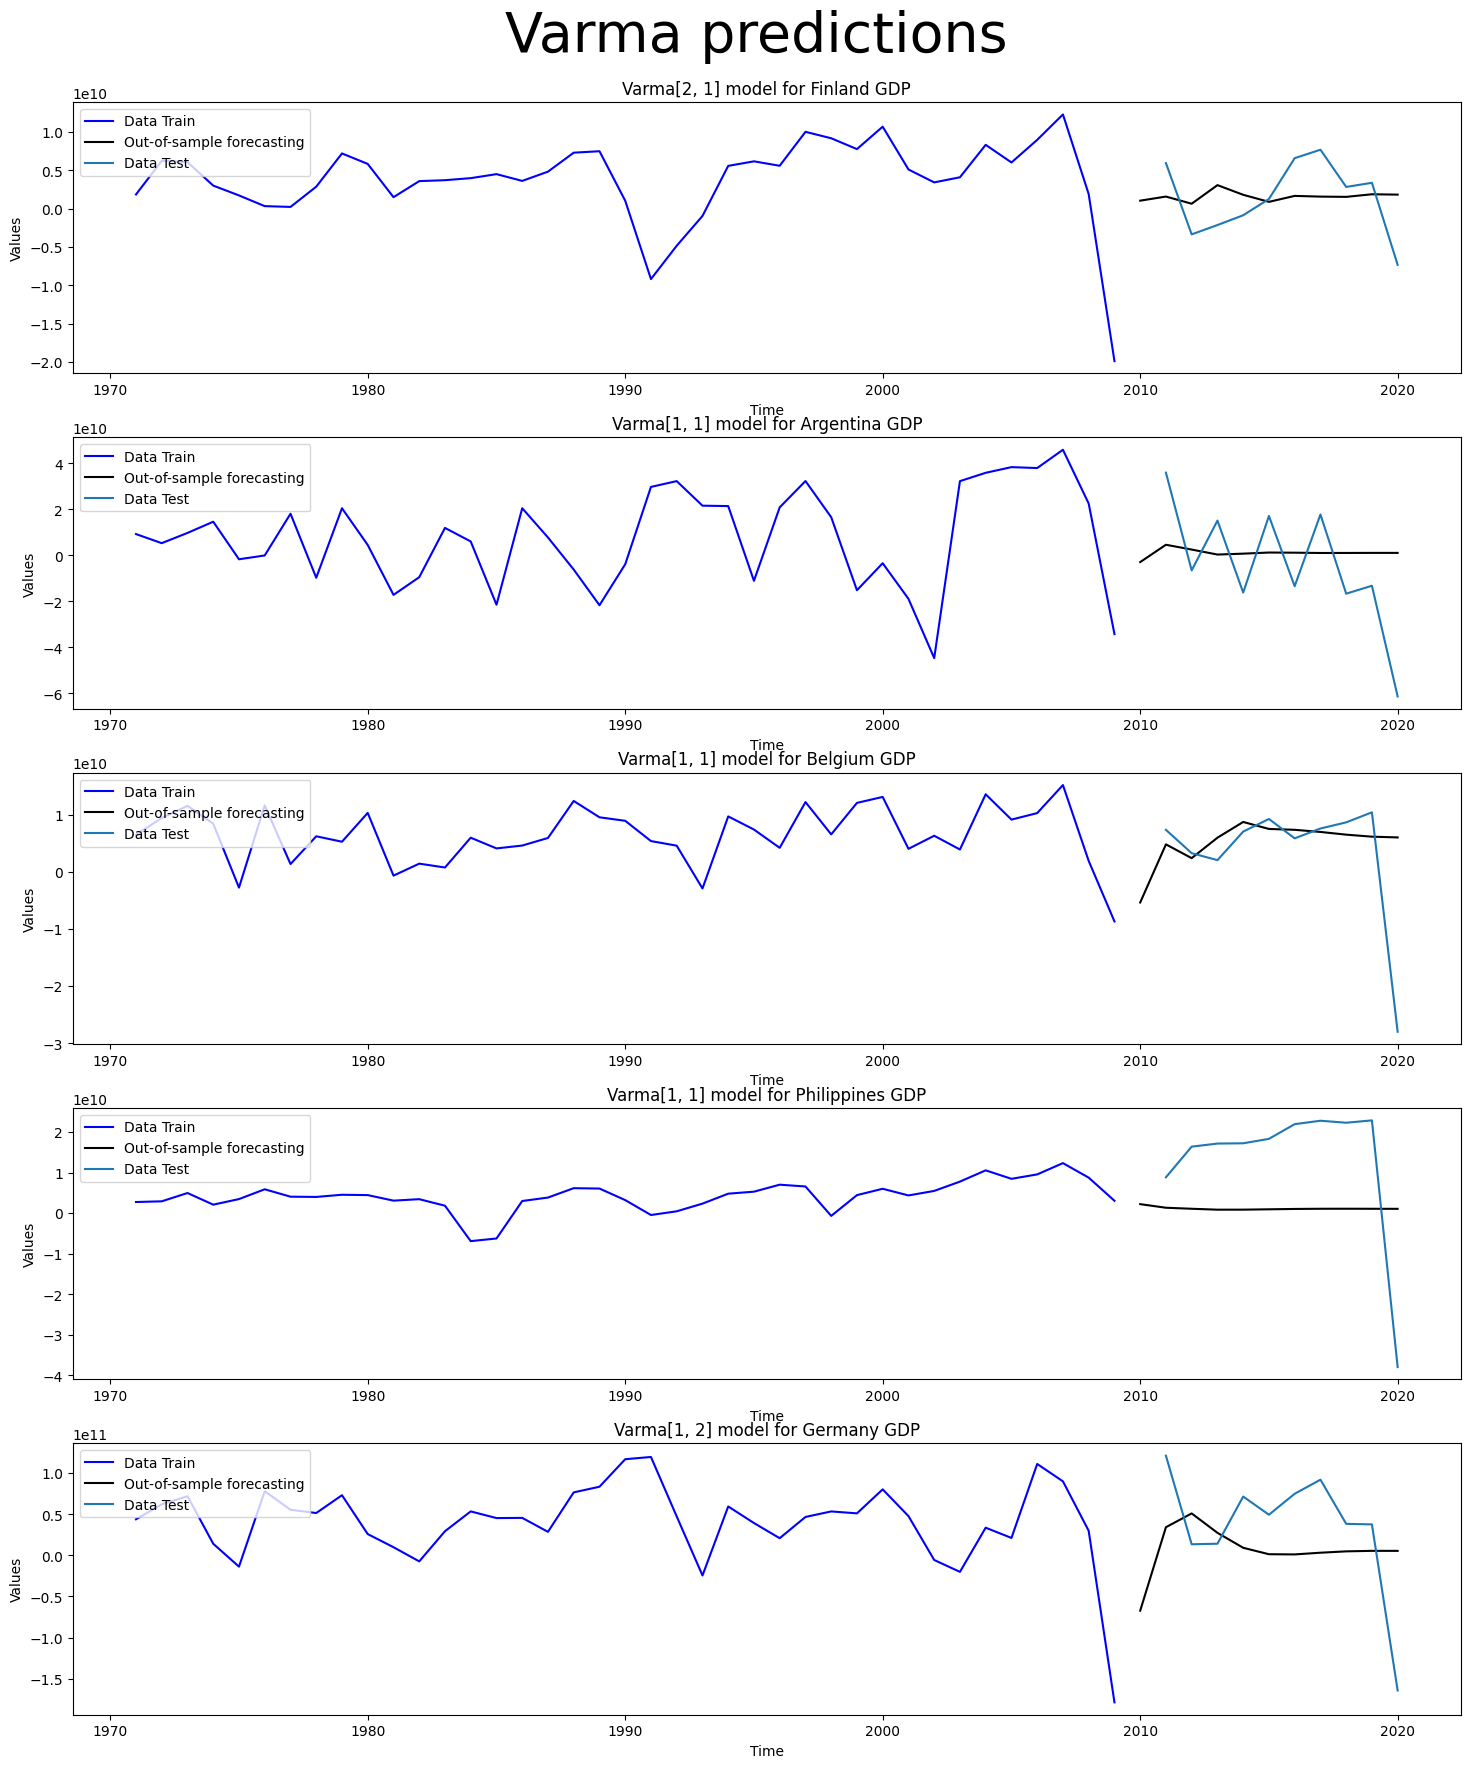

In [42]:
varmax_prediction_list = varma_prediction_plot(varmax_model_list, nation_list, varmax_order, df_train_test_log_dif)

In [32]:
metrics_list_of_df = f.add_metrics('VARMA', varmax_model_list, metrics_list_of_df, df_train_test, nation_list, varmax_prediction_list)

for idx, df in enumerate(metrics_list_of_df):
    print(nation_list[idx])
    display(df)

Finland


Model_name          AIC                  MAE                 RMSE      MAPE
0      VARMA  5435.532417  239741769428.334351  239862007260.142426  0.993377

Argentina


Model_name          AIC                  MAE                 RMSE      MAPE
0      VARMA  7383.710098  623541395838.905762  624015608390.427612  0.998279

Belgium


Model_name          AIC                  MAE                 RMSE      MAPE
0      VARMA  9053.492806  455515567103.196716  455820080626.890076  0.988922

Philippines


Model_name         AIC                 MAE                 RMSE      MAPE
0      VARMA  8870.95658  307297030985.50238  312145641516.667358  0.996065

Germany


Model_name          AIC                   MAE                  RMSE  \
0      VARMA  5893.014062  3353434457234.978027  3357064087303.418457   

       MAPE  
0  0.998009

# TO-DO

- Check arima models, poor performance
    - probable cause in get_prediction wrong start and end
- Add confidence intervals to predictions plot
- VAR
    - diagnostics
    - prediction